In [1]:
import pandas as pd, numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
import mysql.connector

In [3]:
conn = mysql.connector.connect(user='yourname', password='', database='lagou')

In [4]:
cursor = conn.cursor()

In [5]:
total = pd.io.sql.read_sql('select * from job_info;', conn)

In [6]:
cursor.close()
conn.close()

In [8]:
get_num = re.compile(r'([0-9]+).*-([0-9]+).*')
def mean_salary(string):
    nums = get_num.search(string).groups()
    salary = (int(nums[0])+int(nums[1]))/2
    return salary

In [9]:
total['salary'].map(mean_salary).unique()

array([ 17.5,  11.5,  21. ,  20. ,   5. ,  10.5,   3. ,   9. ,  11. ,
         7.5,  25. ,  15. ,   6.5,  10. ,   7. ,  13. ,   8. ,  30. ,
        12. ,  22.5,  12.5,   6. ,  16.5,  13.5,  18.5,  31.5,   9.5,
        21.5,  19. ,   2.5,  37.5,   4. ,   3.5,  14. ,   8.5,  27.5,
        26.5,   5.5,  32.5,   1.5,  40. ,  45. ,  18. ,  23. ,  19.5,
        35. ,  17. ,  51.5,  24. ,  80. ,  16. ,  27. ,   4.5,  75. ,
        50. ,  55. ,  67.5,  70. ,  14.5,  60. ])

In [10]:
total['salary'] = total['salary'].map(mean_salary)

In [12]:
total['industry'][total['industry']=='移动互联网 ,游戏'] = '移动互联网,游戏'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
total['industry'][total['industry']=='移动互联网 社交网络'] = '移动互联网,社交网络'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
fmt = re.compile(r'')

In [15]:
total['industry'] = total['industry'].str.replace(' ,', ',').str.replace(' ', ',').str.replace('、', ',')

In [16]:
label_iter = (set(x.split(',')) for x in total['industry'])
job_labels = sorted(set.union(*label_iter))

In [17]:
job_labels

['O2O',
 '不限',
 '企业服务',
 '信息安全',
 '其他',
 '医疗健康',
 '广告营销',
 '招聘',
 '教育',
 '数据服务',
 '文化娱乐',
 '旅游',
 '游戏',
 '生活服务',
 '电子商务',
 '硬件',
 '社交网络',
 '移动互联网',
 '金融']

In [18]:
len(job_labels)

19

In [19]:
dummies = DataFrame(np.zeros((len(total), len(job_labels))), columns=job_labels)
for i, labels in enumerate(total['industry']):
    dummies.ix[i, labels.split(',')] = 1

In [20]:
dummies

O2O   不限  企业服务  信息安全   其他  医疗健康  广告营销   招聘   教育  数据服务  文化娱乐   旅游   游戏  \
0    0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
1    0.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
2    0.0  0.0   0.0   0.0  1.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
3    1.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
4    0.0  0.0   0.0   0.0  0.0   1.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
5    0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  1.0  0.0   
6    1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
7    0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
8    0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
9    0.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
10   0.0  0.0   0.0   0.0  1.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
11   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
12   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
13   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
14   0.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
15   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
16   0.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
17   0.0  0.0   0.0   0.0  1.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
18   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
19   1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
20   1.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
21   0.0  0.0   0.0   0.0  0.0   1.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
22   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
23   0.0  0.0   0.0   0.0  1.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
24   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
25   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
26   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
27   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
28   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
29   0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
..   ...  ...   ...   ...  ...   ...   ...  ...  ...   ...   ...  ...  ...   
609  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
610  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
611  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
612  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
613  1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
614  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
615  0.0  0.0   1.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
616  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
617  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
618  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
619  1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
620  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
621  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
622  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
623  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0  0.0   
624  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
625  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
626  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
627  0.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0  1.0   
628  1.0  0.0   0.0   0.0  

In [21]:
new_total = total.join(dummies.add_prefix('industy_'))

In [22]:
new_total

num city                   pos_name         company experience major  \
0     31   广州                      数据分析师       广州银行信用卡中心     经验3-5年    硕士   
1     32   广州                      数据分析师            广东智源     经验1-3年    硕士   
2     33   广州             软件工程师 （数据分析方向）            广州银行     经验3-5年    本科   
3     34   广州                      数据分析师             汇桔网    经验5-10年    本科   
4     35   广州                       数据分析             健客网     经验1年以下    本科   
5     36   广州                      数据分析师            骑鹅旅行     经验1-3年    本科   
6     37   广州                 数据分析/结算实习生            恒腾网络       经验不限    本科   
7     38   广州                       数据分析             设计院     经验1-3年    本科   
8     39   广州               数据分析(J11482)              G7     经验3-5年    本科   
9     40   广州                  数据分析师（实习）              探迹       经验不限    本科   
10    41   广州                      数据分析师  广州华胜企业管理服务有限公司     经验3-5年    大专   
11    42   广州                     数据分析专员            三七互娱     经验1-3年    本科   
12    43   广州                      数据分析师             蓝月亮     经验1-3年    本科   
13    44   广州                      数据分析师              荔枝     经验1-3年    本科   
14    45   广州                    高级数据分析师      Gridsum 国双    经验5-10年    本科   
15    46   广州                数据分析师-信用卡方向       广州银行信用卡中心     经验3-5年    本科   
16    47   广州                      数据分析师            广东智源     经验1-3年    本科   
17    48   广州                    数据分析工程师            广州银行     经验3-5年    本科   
18    49   广州               数据分析(J11482)              G7     经验3-5年    本科   
19    50   广州                      数据分析师            恒腾网络     经验1-3年    本科   
20    51   广州                     数据分析主管             汇桔网     经验3-5年    本科   
21    52   广州                      数据分析师             健客网     经验3-5年    本科   
22    53   广州                       数据分析            富力地产     经验3-5年    本科   
23    54   广州                     数据分析经理            东信北邮     经验1-3年    本科   
24    55   广州                   大数据数据分析师          美的集团IT     经验3-5年    本科   
25    56   广州                     高级数据分析             赛百威     经验1-3年    本科   
26    57   广州                     数据分析专员            三七互娱     经验1-3年    本科   
27    58   广州                    高级数据分析师            云徙科技     经验3-5年    本科   
28    59   广州                      数据分析师    广州棒谷科技股份有限公司     经验3-5年    不限   
29    60   广州                  行业及数据分析经理            大数金融     经验3-5年    本科   
..   ...  ...                        ...             ...        ...   ...   
609  640   深圳                 大数据分析高级工程师            光启集团    经验5-10年    本科   
610  641   深圳                   大数据分析工程师            共筑网科     经验3-5年    本科   
611  642   深圳                 大数据分析开发工程师             迷你玩    经验5-10年    大专   
612  643   深圳                   质量数据分析专员              云丁     经验1-3年    大专   
613  644   深圳              大区运营专员（数据分析师）              斗米     经验1-3年    本科   
614  645   深圳                 软件大数据分析工程师            vivo     经验1-3年    本科   
615  646   深圳                大数据分析项目实施顾问             慧眼云     经验1-3年    本科   
616  647   深圳        数据分析平台开发工程师（Python）              腾讯     经验3-5年    本科   
617  648   深圳                 大数据分析高级工程师            光启集团     经验3-5年    本科   
618  649   深圳  SA-腾讯社交广告数据分析工程师（微信广告 深圳）              腾讯     经验1-3年    本科   
619  650   深圳                      数据分析师       货拉拉手机打车软件     经验3-5年    本科   
620  651   深圳                  高级数据分析工程师        顺丰科技有限公司     经验3-5年    本科   
621  652   深圳                 数据分析主管（市场）            中安信业     经验3-5年    本科   
622  653   深圳               数据分析主管（广告业务）              极光     经验3-5年    本科   
623  654   深圳               数据分析师（视频APP）              极光     经验1-3年    本科   
624  655   深圳            高级数据分析师（数据建模方向）            中安信业     经验3-5年    本科   
625  656   深圳                  高级广告数据分析师            OPPO     经验3-5年    本科   
626  657   深圳                  高级游戏数据分析师            OPPO     经验3-5年    本科   
627  658   深圳   19116-腾讯觅影数据分析高级产品经理（深圳）              腾讯     经验3-5年    本科   
628  659   深圳           培训数据分析专家(J11050)       货拉拉手机打车软件     经验1-3年    大专   
6

In [23]:
dummies.drop(['招聘', '不限'], axis=1, inplace=True) #总共就3条，而且不知道招聘是个什么鬼

In [24]:
def industry_salary(series):
    return series[series!=0].mean()

In [25]:
def industry_salary_std(series):
    return series[series!=0].std()/np.sqrt(len(series[series!=0]))

In [26]:
new_total['comp_features'][new_total['comp_features']=='待遇佳福利好平台广'] = '待遇佳,福利好,平台广'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_total['comp_features'][new_total['comp_features']=='周末双休朝九晚六五险一金年度旅游'] = '周末双休,朝九晚六,五险一金,年度旅游'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
cf_iter = (set(x.split(','))  for x in  new_total['comp_features'])

In [29]:
new_total['comp_features'] = new_total['comp_features'].str.replace('~~', '').str.replace(r'[， !~、\+]',',').str.replace(r'(xa0)+', ',')

In [30]:
comp_labels = Series(list(set.union(*(set(x.split(',')) for x in new_total['comp_features']))))

In [31]:
comp_labels_copy = Series(list(set.union(*(set(x.split(',')) for x in new_total['comp_features']))))

<pre>
手动调整一些关键词，对一些表述不同但近义的词处理为同一个，突出主要的内容：
</pre>

In [32]:
def test_kw(keyword):
    lst = []
    for i in range(len(comp_labels)):
        if keyword in comp_labels[i]:
            lst.append(i)
            print(i, comp_labels[i])
    print(lst)

In [33]:
#test_kw('发展')

In [34]:
#comp_labels.ix[[43, 45, 51, 53, 54, 111, 115, 150, 183, 264, 265, 334, 416, 435, 475, 486, 514, 515, 568, 602, 611, 657, 659],] = '发展前景好'

In [35]:
#test_kw('团队')

In [36]:
#test_kw('氛围')

In [37]:
#test_kw('年轻')

In [38]:
#comp_labels.ix[[26, 65, 66, 75, 106, 161, 180, 259, 274, 280, 289, 303, 347, 361, 392, 418, 422, 432, 457, 490, 575, 675, 701, 717, 720],]='团队优秀'

In [39]:
#comp_labels.ix[[13, 622, 675],] = '年轻化团队'

In [40]:
#comp_labels.ix[[30, 34, 50, 74, 91, 130, 136, 154, 192, 250, 271, 286, 303, 306, 376, 396, 397, 398, 399, 443, 472, 495, 520, 551, 565, 640, 710, 717],] = '氛围好'

In [41]:
#test_kw('旅游')

In [42]:
#comp_labels.ix[[3, 157, 194, 195, 340, 348, 459, 466, 534, 557, 561, 607, 648, 651, 652, 653],]='员工旅游'

In [43]:
#test_kw('五险')

In [44]:
#comp_labels.ix[[12, 309],]='五险一金'
#comp_labels.ix[[22, 458, 572],]='五险'

In [45]:
#test_kw('餐')

In [46]:
#comp_labels.ix[[20, 35, 79, 86, 97, 101, 120, 147, 152, 173, 175, 320, 338, 403, 413, 456, 496, 501, 509, 544, 548, 595, 616, 692, 704, 714],]='餐补'

In [47]:
#test_kw('房')

In [48]:
#comp_labels.ix[[331,431,433],]='房补'

In [49]:
#test_kw('成长')

In [50]:
#test_kw('领导')

In [51]:
#comp_labels.ix[[90, 96, 114, 163, 174, 261, 519],]='领导nice'

In [52]:
#test_kw('平台')

In [53]:
#comp_labels.ix[[4, 21, 45, 69, 111, 223, 224, 249, 265, 299, 344, 359, 419, 453, 577, 585, 596, 723],] = '平台大'

In [54]:
#comp_labels.ix[[224, 249,643],] = '平台稳定'

In [55]:
#test_kw('大牛')

In [56]:
#comp_labels.ix[[23, 52, 66, 191, 300, 418, 454, 562, 571, 575, 671]] = '同事大牛'

In [57]:
#test_kw('晋升')

In [58]:
#comp_labels.ix[[59, 208, 231, 251, 308, 323, 427, 436, 451, 470, 493, 510, 573, 624, 629, 687, 688, 707, 716, 722],]='晋升'

In [59]:
#test_kw('薪')

In [60]:
#comp_labels.ix[[5, 41, 57, 112, 146, 159, 165, 202, 270, 341, 357, 362, 450, 464, 476, 489, 527, 537, 558, 574, 619, 641, 661, 682, 694, 696],] = '薪酬待遇好'

In [61]:
#test_kw('待遇')

In [62]:
#comp_labels.ix[[67, 84, 190, 260, 410, 425, 526, 583, 697],] = '薪酬待遇好'

In [63]:
#test_kw('福利')

In [64]:
#comp_labels.ix[[78, 137, 172, 178, 207, 241, 245, 301, 408, 426, 442, 463, 491, 536, 547, 603, 609, 630, 632,],] = '福利优'

In [65]:
#test_kw('年终奖')

In [66]:
#comp_labels.ix[[83, 255]] = '年终奖丰厚'

In [67]:
#comp_labels.ix[[349, 462],] = '六险一金'

In [68]:
#test_kw('六险')

In [69]:
#test_kw('绩效')

In [70]:
#test_kw('奖金')

In [71]:
#comp_labels.ix[[517, 698]] = '绩效高'

In [72]:
#test_kw('弹性')

In [73]:
#comp_labels.ix[[258, 295, 313, 350, 372, 488, 506, 613, 715, 719],] = '弹性工作制'

In [74]:
#test_kw('休')

In [75]:
#comp_labels.ix[[58, 169, 213, 242, 374, 384],] = '双休'

In [76]:
#test_kw('假')

In [77]:
#comp_labels.ix[[262, 283],] = '带薪休假'
#comp_labels.ix[[18, 655],] = '假期多'
#comp_labels.ix[[434, 614, 635]] = '法定节假日'

In [78]:
#test_kw('数据')

In [79]:
#comp_labels.ix[[36, 39, 593, 708],] = '数据量大'
#comp_labels.ix[[129, 140, 201, 219, 252, 269,649, 669]] = '大数据'

In [80]:
#test_kw('扁平')

In [81]:
#comp_labels.ix[[148, 248, 288, 530, 665, 689, 690],] = '扁平化管理'

In [82]:
#test_kw('管理')

In [83]:
#test_kw('公司')

In [84]:
#test_kw('节日')

In [85]:
#test_kw('数据分析')

In [86]:
#test_kw('环境')

In [87]:
#comp_labels.ix[[81, 99, 116, 228, 336, 406, 414, 447, 449, 623, 703],] = '工作环境佳'

In [88]:
#test_kw('下午茶')

In [89]:
#comp_labels.ix[[32, 56, 76, 311, 411],] = '下午茶'

In [90]:
#test_kw('体检')

In [91]:
#comp_labels.ix[[153, 155, 378, 503, 549],] = '体检'

In [92]:
#test_kw('年底')

In [93]:
#test_kw('技术')

In [94]:
#test_kw('班车')

In [95]:
#comp_labels.ix[[1, 158, 312, 395],] = '班车接送'

In [96]:
#test_kw('成长')

In [97]:
#comp_labels.ix[[92, 93, 314, 318, 401],] = '成长快'
#comp_labels.ix[[6, 615],] = '成长空间大'

In [98]:
#test_kw('金融')

In [99]:
#comp_labels.ix[[140, 206, 257, 380, 405, 480, 518, 660, 672]] = '金融'

In [100]:
#test_kw('互联网')

In [101]:
#comp_labels.ix[[9, 353, 390, 589]] = '互联网'

In [102]:
#test_kw('前景')

In [103]:
#comp_labels.ix[[181, 391, 608]] = '发展前景好'

In [104]:
#test_kw('行业')

In [105]:
#test_kw('核心')

In [106]:
#test_kw('强')

In [107]:
#comp_labels.ix[[226, 247, 282, 400, 600]] = '500强'

In [108]:
#transform = {}

In [109]:
'''
for i in range(len(comp_labels)):
    if comp_labels[i] != comp_labels_copy[i]:
        transform[comp_labels_copy[i]] = comp_labels[i]
'''

'\nfor i in range(len(comp_labels)):\n    if comp_labels[i] != comp_labels_copy[i]:\n        transform[comp_labels_copy[i]] = comp_labels[i]\n'

In [110]:
#transform

In [111]:
import json

In [112]:
#trans_json = json.dumps(transform,ensure_ascii=False)

In [113]:
#print(trans_json)

In [114]:
#因为set是无序的，每次用的顺序都不一样，所以我把之前的结果保存了下来

In [115]:
with open('transform', 'r') as file:
    transform = file.read()

In [116]:
transform = json.loads(transform)

In [117]:
new_total['job_features'] =  new_total['job_features'].str.replace(r'growth hacking', 'growth-hacking').str.replace(r'[， !~、\+]',',')

In [118]:
new_total['job_features'] = new_total['job_features'].str.replace('领导好', '领导nice').str.replace('销售分析',  '销售').str.replace('腾讯系团队', '腾讯系')

In [119]:
sz = new_total[new_total['city']=='深圳']
gz = new_total[new_total['city']=='广州']
mobile_i = new_total[new_total['industy_移动互联网']==1]
finance = new_total[new_total['industy_金融']==1]
e_commerce = new_total[new_total['industy_电子商务']==1]
data_service = new_total[new_total['industy_数据服务']==1]
gaming = new_total[new_total['industy_游戏']==1]

## 两个城市工资分布

[(1.5, 2), (2.5, 3), (3.0, 4), (3.5, 1), (4.0, 4), (5.0, 12), (5.5, 2), (6.0, 5), (6.5, 4), (7.0, 11), (7.5, 5), (8.0, 6), (8.5, 4), (9.0, 18), (9.5, 3), (10.0, 13), (10.5, 4), (11.0, 3), (11.5, 18), (12.0, 4), (12.5, 14), (13.0, 1), (13.5, 2), (14.0, 3), (15.0, 34), (16.5, 2), (17.5, 11), (18.0, 1), (18.5, 1), (19.0, 2), (19.5, 1), (20.0, 15), (21.0, 2), (21.5, 1), (22.5, 15), (23.0, 1), (25.0, 4), (26.5, 1), (27.5, 2), (30.0, 7), (31.5, 1), (32.5, 2), (37.5, 5), (40.0, 1), (45.0, 1)]


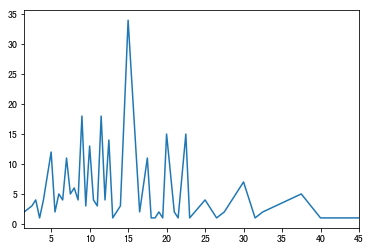

In [120]:
gz['salary'].value_counts().sort_index().plot()
print(list(zip(gz['salary'].value_counts().sort_index().index, gz['salary'].value_counts().sort_index().values)))

[(4.0, 1), (4.5, 1), (5.0, 8), (5.5, 1), (6.0, 8), (6.5, 15), (7.0, 15), (7.5, 7), (8.0, 6), (8.5, 7), (9.0, 11), (9.5, 4), (10.0, 6), (10.5, 10), (11.0, 3), (11.5, 21), (12.0, 11), (12.5, 23), (13.0, 2), (13.5, 1), (14.0, 5), (14.5, 1), (15.0, 36), (16.0, 3), (16.5, 3), (17.0, 2), (17.5, 7), (18.0, 6), (18.5, 1), (19.0, 4), (19.5, 1), (20.0, 27), (21.5, 1), (22.5, 47), (23.0, 1), (24.0, 7), (25.0, 7), (27.0, 7), (27.5, 5), (30.0, 20), (32.5, 5), (35.0, 2), (37.5, 6), (40.0, 8), (45.0, 1), (50.0, 1), (51.5, 1), (55.0, 1), (60.0, 1), (67.5, 1), (70.0, 1), (75.0, 2), (80.0, 1)]


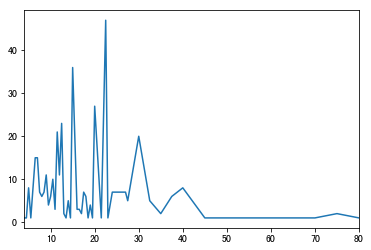

In [121]:
sz['salary'].value_counts().sort_index().plot()
print(list(zip(sz['salary'].value_counts().sort_index().index, sz['salary'].value_counts().sort_index().values)))

### 不同行业薪资平均水平

### 可以加一个bias bar

Index(['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件',
       '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全'],
      dtype='object')
[   4.   10.   10.   11.   12.   13.   15.   16.   19.   25.   39.   49.
   67.   85.  117.  153.  340.]
{value:4, name:"信息安全"},
{value:10, name:"教育"},
{value:10, name:"旅游"},
{value:11, name:"文化娱乐"},
{value:12, name:"医疗健康"},
{value:13, name:"社交网络"},
{value:15, name:"广告营销"},
{value:16, name:"硬件"},
{value:19, name:"生活服务"},
{value:25, name:"其他"},
{value:39, name:"O2O"},
{value:49, name:"企业服务"},
{value:67, name:"游戏"},
{value:85, name:"数据服务"},
{value:117, name:"电子商务"},
{value:153, name:"金融"},
{value:340, name:"移动互联网"},


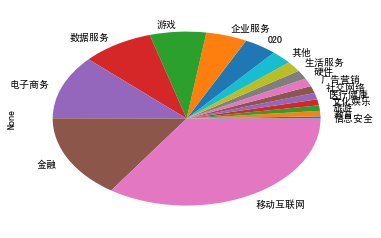

In [122]:
dummies.sum().sort_values().plot(kind='pie')
print(dummies.sum().sort_values(ascending=False).index)
print(dummies.sum().sort_values().values)
for i in dummies.sum().sort_values().index:
    print('{value:%d, name:"%s"},' % (dummies.sum().sort_values()[i], i))

{value:3, name:"信息安全"},
{value:5, name:"教育"},
{value:6, name:"硬件"},
{value:7, name:"其他"},
{value:8, name:"医疗健康"},
{value:8, name:"旅游"},
{value:9, name:"文化娱乐"},
{value:9, name:"社交网络"},
{value:9, name:"生活服务"},
{value:11, name:"O2O"},
{value:12, name:"广告营销"},
{value:21, name:"企业服务"},
{value:28, name:"游戏"},
{value:35, name:"金融"},
{value:43, name:"数据服务"},
{value:47, name:"电子商务"},
{value:114, name:"移动互联网"},


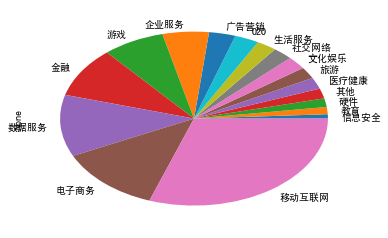

In [123]:
dummies.ix[new_total['city']=='广州',].sum().sort_values().plot(kind='pie')
for i in dummies.ix[new_total['city']=='广州',].sum().sort_values().index:
    print('{value:%d, name:"%s"},' % (dummies.ix[new_total['city']=='广州',].sum().sort_values()[i], i))

{value:1, name:"信息安全"},
{value:2, name:"文化娱乐"},
{value:2, name:"旅游"},
{value:3, name:"广告营销"},
{value:4, name:"社交网络"},
{value:4, name:"医疗健康"},
{value:5, name:"教育"},
{value:10, name:"硬件"},
{value:10, name:"生活服务"},
{value:18, name:"其他"},
{value:28, name:"O2O"},
{value:28, name:"企业服务"},
{value:39, name:"游戏"},
{value:42, name:"数据服务"},
{value:70, name:"电子商务"},
{value:118, name:"金融"},
{value:226, name:"移动互联网"},


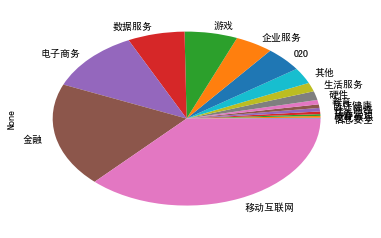

In [124]:
dummies.ix[new_total['city']=='深圳',].sum().sort_values().plot(kind='pie')
for i in dummies.ix[new_total['city']=='深圳',].sum().sort_values().index:
    print('{value:%d, name:"%s"},' % (dummies.ix[new_total['city']=='深圳',].sum().sort_values()[i], i))

[0,13.758689,14.495697],
[1,13.476712,14.151859],
[2,14.963164,15.802793],
[3,11.985933,12.618719],
[4,15.390149,16.288422],
[5,9.905406,10.570784],
[6,11.892979,12.652475],
[7,10.630489,11.369511],
[8,12.028701,12.526855],
[9,14.713635,15.286365],
[10,10.963552,11.786448],
[11,20.459618,21.651493],
[12,12.361395,13.263605],
[13,15.107365,16.225969],
[14,9.491369,9.758631],
[15,12.215728,12.584272],
[16,9.559205,10.440795],


array([ 14.12719298,  13.81428571,  15.38297872,  12.30232558,
        15.83928571,  10.23809524,  12.27272727,  11.        ,
        12.27777778,  15.        ,  11.375     ,  21.05555556,
        12.8125    ,  15.66666667,   9.625     ,  12.4       ,  10.        ])

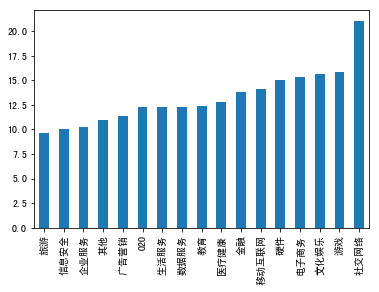

In [125]:
dummies.mul(gz['salary'],axis=0).apply(industry_salary).sort_values().plot(kind='bar')
m = dummies.mul(gz['salary'],axis=0).apply(industry_salary).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values
s = dummies.mul(gz['salary'],axis=0).apply(industry_salary_std).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
dummies.mul(gz['salary'],axis=0).apply(industry_salary).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values


In [126]:
dummies.mul(sz['salary'],axis=0).apply(industry_salary).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']]

移动互联网    18.878319
金融       16.355932
电子商务     17.728571
数据服务     18.297619
游戏       21.205128
企业服务     13.160714
O2O      15.607143
其他       16.805556
生活服务     15.650000
硬件       21.000000
广告营销     14.500000
社交网络     20.000000
医疗健康     10.250000
文化娱乐     22.500000
旅游       10.500000
教育        9.400000
信息安全     11.500000
dtype: float64

In [127]:
dummies.mul(sz['salary'],axis=0).apply(industry_salary_std).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']]

移动互联网    0.539687
金融       0.429473
电子商务     0.771101
数据服务     0.384363
游戏       0.661740
企业服务     0.622356
O2O      0.601812
其他       0.627492
生活服务     0.584371
硬件       0.582213
广告营销     0.513336
社交网络     0.438529
医疗健康     0.273275
文化娱乐     0.000000
旅游       0.396203
教育       0.238128
信息安全          NaN
dtype: float64

[0,18.338631,19.418006],
[1,15.926459,16.785406],
[2,16.957471,18.499672],
[3,17.913256,18.681983],
[4,20.543388,21.866868],
[5,12.538358,13.783071],
[6,15.005331,16.208955],
[7,16.178064,17.433047],
[8,15.065629,16.234371],
[9,20.417787,21.582213],
[10,13.986664,15.013336],
[11,19.561471,20.438529],
[12,9.976725,10.523275],
[13,22.500000,22.500000],
[14,10.103797,10.896203],
[15,9.161872,9.638128],
[16,nan,nan],


array([ 18.87831858,  16.3559322 ,  17.72857143,  18.29761905,
        21.20512821,  13.16071429,  15.60714286,  16.80555556,
        15.65      ,  21.        ,  14.5       ,  20.        ,
        10.25      ,  22.5       ,  10.5       ,   9.4       ,  11.5       ])

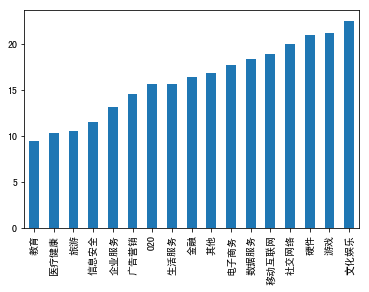

In [128]:
dummies.mul(sz['salary'],axis=0).apply(industry_salary).sort_values().plot(kind='bar')
m1 = dummies.mul(sz['salary'],axis=0).apply(industry_salary).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values
s1 = dummies.mul(sz['salary'],axis=0).apply(industry_salary_std).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
dummies.mul(sz['salary'],axis=0).apply(industry_salary).ix[['移动互联网', '金融', '电子商务', '数据服务', '游戏', '企业服务', 'O2O', '其他', '生活服务', '硬件', '广告营销', '社交网络', '医疗健康', '文化娱乐', '旅游', '教育', '信息安全']].values


In [129]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,13.758689,14.495697,18.338631,19.418006],
[1,13.476712,14.151859,15.926459,16.785406],
[2,14.963164,15.802793,16.957471,18.499672],
[3,11.985933,12.618719,17.913256,18.681983],
[4,15.390149,16.288422,20.543388,21.866868],
[5,9.905406,10.570784,12.538358,13.783071],
[6,11.892979,12.652475,15.005331,16.208955],
[7,10.630489,11.369511,16.178064,17.433047],
[8,12.028701,12.526855,15.065629,16.234371],
[9,14.713635,15.286365,20.417787,21.582213],
[10,10.963552,11.786448,13.986664,15.013336],
[11,20.459618,21.651493,19.561471,20.438529],
[12,12.361395,13.263605,9.976725,10.523275],
[13,15.107365,16.225969,22.500000,22.500000],
[14,9.491369,9.758631,10.103797,10.896203],
[15,12.215728,12.584272,9.161872,9.638128],
[16,9.559205,10.440795,nan,nan],


## 不同城市工资融资情况和对应薪资水平

In [130]:
new_total['condition'].value_counts().index

Index(['不需要融资', '上市公司', '未融资', 'A轮', 'C轮', 'B轮', 'D轮及以上', '天使轮'], dtype='object')

{values:77, name:"上市公司"},
{values:70, name:"不需要融资"},
{values:37, name:"未融资"},
{values:24, name:"A轮"},
{values:17, name:"C轮"},
{values:15, name:"B轮"},
{values:9, name:"D轮及以上"},
{values:7, name:"天使轮"},


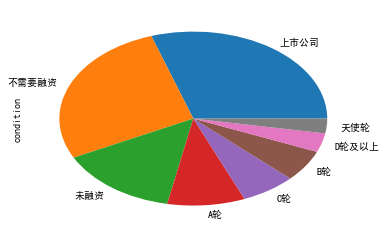

In [131]:
gz['condition'].value_counts().plot(kind='pie')
for i, j in zip(gz['condition'].value_counts().values, gz['condition'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

condition
天使轮      10.571429
A轮       11.645833
B轮       14.633333
C轮       13.500000
D轮及以上    20.722222
上市公司     16.370130
未融资      12.094595
不需要融资    12.714286
Name: salary, dtype: float64
[0,8.307770,12.835087],
[1,10.501978,12.789689],
[2,12.523003,16.743663],
[3,12.076717,14.923283],
[4,17.376297,24.068148],
[5,15.400918,17.339342],
[6,10.876790,13.312399],
[7,11.835058,13.593513],


array([ 10.57142857,  11.64583333,  14.63333333,  13.5       ,
        20.72222222,  16.37012987,  12.09459459,  12.71428571])

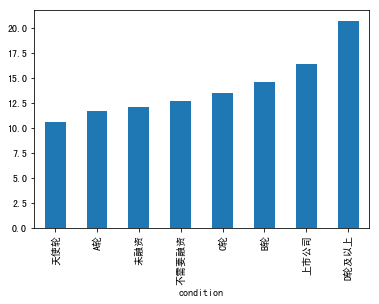

In [132]:
gz['salary'].groupby(gz['condition']).mean().sort_values().plot(kind='bar')
print(gz['salary'].groupby(gz['condition']).apply(industry_salary).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']])
m = gz['salary'].groupby(gz['condition']).apply(industry_salary).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']].values
s = gz['salary'].groupby(gz['condition']).apply(industry_salary_std).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
m

{values:133, name:"不需要融资"},
{values:81, name:"上市公司"},
{values:43, name:"A轮"},
{values:42, name:"C轮"},
{values:31, name:"B轮"},
{values:30, name:"未融资"},
{values:14, name:"D轮及以上"},
{values:9, name:"天使轮"},


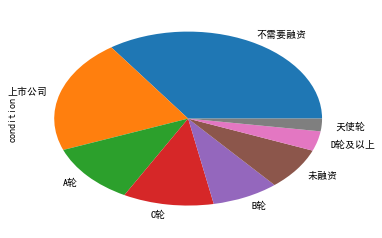

In [133]:
sz['condition'].value_counts().plot(kind='pie')
for i, j in zip(sz['condition'].value_counts().values, sz['condition'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

condition
天使轮      15.111111
A轮       15.465116
B轮       18.580645
C轮       20.761905
D轮及以上    20.285714
上市公司     21.376543
未融资      19.100000
不需要融资    15.646617
Name: salary, dtype: float64
[0,13.312621,16.909602],
[1,14.144189,16.786044],
[2,16.559640,20.601650],
[3,19.332554,22.191255],
[4,15.720041,24.851387],
[5,20.094379,22.658708],
[6,16.351395,21.848605],
[7,14.743646,16.549587],


array([ 15.11111111,  15.46511628,  18.58064516,  20.76190476,
        20.28571429,  21.37654321,  19.1       ,  15.64661654])

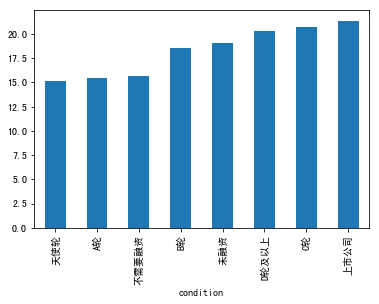

In [134]:
sz['salary'].groupby(sz['condition']).mean().sort_values().plot(kind='bar')
print(sz['salary'].groupby(sz['condition']).apply(industry_salary).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']])
m1 = sz['salary'].groupby(sz['condition']).apply(industry_salary).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']].values
s1 = sz['salary'].groupby(sz['condition']).apply(industry_salary_std).ix[['天使轮', 'A轮', 'B轮', 'C轮', 'D轮及以上', '上市公司', '未融资', '不需要融资']].values
for i in list(range(len(m1))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
m1

In [135]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,8.307770,12.835087,13.312621,16.909602],
[1,10.501978,12.789689,14.144189,16.786044],
[2,12.523003,16.743663,16.559640,20.601650],
[3,12.076717,14.923283,19.332554,22.191255],
[4,17.376297,24.068148,15.720041,24.851387],
[5,15.400918,17.339342,20.094379,22.658708],
[6,10.876790,13.312399,16.351395,21.848605],
[7,11.835058,13.593513,14.743646,16.549587],


## 不同城市对经验的要求和相应工资水平

In [136]:
new_total['experience'].value_counts().index

Index(['经验1-3年', '经验3-5年', '经验不限', '经验5-10年', '经验应届毕业生', '经验1年以下'], dtype='object')

{values:102, name:"经验1-3年"},
{values:81, name:"经验3-5年"},
{values:32, name:"经验不限"},
{values:21, name:"经验5-10年"},
{values:11, name:"经验应届毕业生"},
{values:9, name:"经验1年以下"},


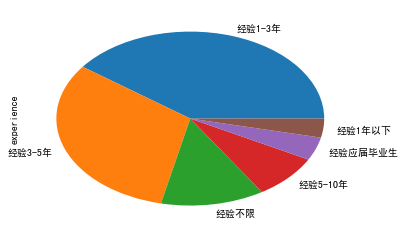

In [137]:
gz['experience'].value_counts().plot(kind='pie')
for i, j in zip(gz['experience'].value_counts().values, gz['experience'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

experience
经验不限        9.875000
经验应届毕业生     4.818182
经验1年以下      6.444444
经验1-3年     12.034314
经验3-5年     17.129630
经验5-10年    25.952381
Name: salary, dtype: float64
[0,8.823887,10.926113],
[1,3.967319,5.669044],
[2,5.481793,7.407096],
[3,11.420249,12.648378],
[4,16.431540,17.827719],
[5,24.197827,27.706934],


array([  9.875     ,   4.81818182,   6.44444444,  12.03431373,
        17.12962963,  25.95238095])

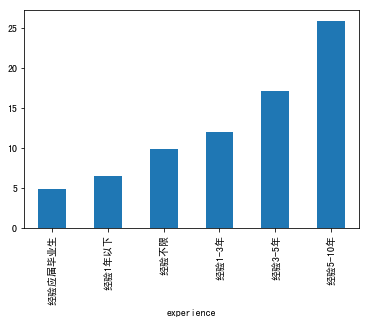

In [138]:
gz['salary'].groupby(gz['experience']).mean().sort_values().plot(kind='bar')
print(gz['salary'].groupby(gz['experience']).apply(industry_salary).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']])
m = gz['salary'].groupby(gz['experience']).apply(industry_salary).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']].values
s = gz['salary'].groupby(gz['experience']).apply(industry_salary_std).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
m

{values:144, name:"经验1-3年"},
{values:143, name:"经验3-5年"},
{values:47, name:"经验5-10年"},
{values:38, name:"经验不限"},
{values:6, name:"经验1年以下"},
{values:5, name:"经验应届毕业生"},


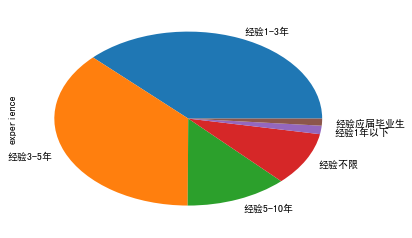

In [139]:
sz['experience'].value_counts().plot(kind='pie')
for i, j in zip(sz['experience'].value_counts().values, sz['experience'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

experience
经验不限       12.065789
经验应届毕业生    14.000000
经验1年以下      7.333333
经验1-3年     12.802083
经验3-5年     19.996503
经验5-10年    34.957447
Name: salary, dtype: float64
[0,10.880116,13.251463],
[1,7.368635,20.631365],
[2,6.138437,8.528230],
[3,12.296909,13.307258],
[4,19.419171,20.573836],
[5,32.459768,37.455125],


array([ 12.06578947,  14.        ,   7.33333333,  12.80208333,
        19.9965035 ,  34.95744681])

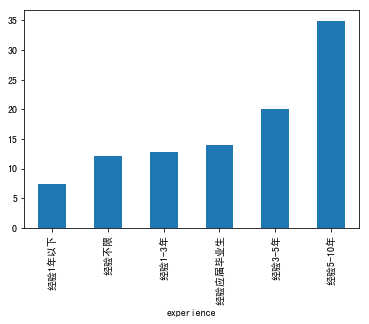

In [140]:
sz['salary'].groupby(sz['experience']).mean().sort_values().plot(kind='bar')
print(sz['salary'].groupby(sz['experience']).apply(industry_salary).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']])
m1 = sz['salary'].groupby(sz['experience']).apply(industry_salary).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']].values
s1 = sz['salary'].groupby(sz['experience']).apply(industry_salary_std).ix[['经验不限', '经验应届毕业生', '经验1年以下','经验1-3年', '经验3-5年', '经验5-10年']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
m1

In [141]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,8.823887,10.926113,10.880116,13.251463],
[1,3.967319,5.669044,7.368635,20.631365],
[2,5.481793,7.407096,6.138437,8.528230],
[3,11.420249,12.648378,12.296909,13.307258],
[4,16.431540,17.827719,19.419171,20.573836],
[5,24.197827,27.706934,32.459768,37.455125],


## 不同城市规模分布和对应薪资水平

{values:91, name:"2000人以上"},
{values:60, name:"150-500人"},
{values:47, name:"500-2000人"},
{values:33, name:"50-150人"},
{values:23, name:"15-50人"},
{values:2, name:"少于15人"},


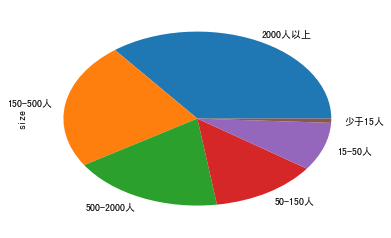

In [142]:
gz['size'].value_counts().plot(kind='pie')
for i, j in zip(gz['size'].value_counts().values, gz['size'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

size
少于15人         5.500000
15-50人       10.434783
50-150人       8.878788
150-500人     13.833333
500-2000人    13.914894
2000人以上      17.131868
Name: salary, dtype: float64
[0,1.500000,9.500000],
[1,9.056197,11.813368],
[2,8.202124,9.555452],
[3,12.863982,14.802685],
[4,12.834379,14.995408],
[5,16.259947,18.003789],


array([  5.5       ,  10.43478261,   8.87878788,  13.83333333,
        13.91489362,  17.13186813])

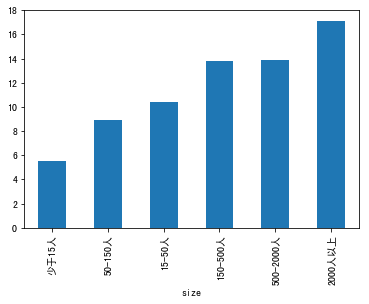

In [143]:
gz['salary'].groupby(gz['size']).mean().sort_values().plot(kind='bar')
print(gz['salary'].groupby(gz['size']).apply(industry_salary).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']])
m = gz['salary'].groupby(gz['size']).apply(industry_salary).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']].values
s = gz['salary'].groupby(gz['size']).apply(industry_salary_std).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
m

{values:163, name:"2000人以上"},
{values:79, name:"500-2000人"},
{values:70, name:"150-500人"},
{values:43, name:"50-150人"},
{values:27, name:"15-50人"},
{values:1, name:"少于15人"},


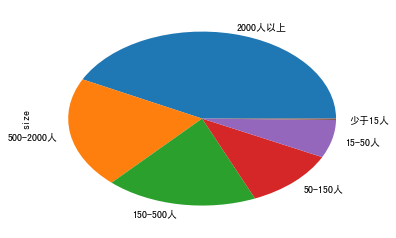

In [144]:
sz['size'].value_counts().plot(kind='pie')
for i, j in zip(sz['size'].value_counts().values, sz['size'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

size
少于15人        40.000000
15-50人       13.944444
50-150人      17.558140
150-500人     15.028571
500-2000人    17.841772
2000人以上      20.156442
Name: salary, dtype: float64
[0,nan,nan],
[1,12.126848,15.762041],
[2,15.659387,19.456892],
[3,14.179879,15.877263],
[4,16.502149,19.181396],
[5,19.227140,21.085743],


array([ 40.        ,  13.94444444,  17.55813953,  15.02857143,
        17.84177215,  20.15644172])

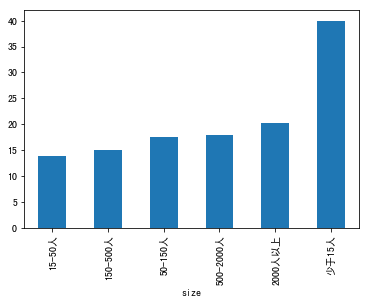

In [145]:
sz['salary'].groupby(sz['size']).mean().sort_values().plot(kind='bar')
print(sz['salary'].groupby(sz['size']).apply(industry_salary).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']])
m1 = sz['salary'].groupby(sz['size']).apply(industry_salary).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']].values
s1 = sz['salary'].groupby(sz['size']).apply(industry_salary_std).ix[['少于15人', '15-50人', '50-150人', '150-500人','500-2000人', '2000人以上']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
m1

In [146]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,1.500000,9.500000,nan,nan],
[1,9.056197,11.813368,12.126848,15.762041],
[2,8.202124,9.555452,15.659387,19.456892],
[3,12.863982,14.802685,14.179879,15.877263],
[4,12.834379,14.995408,16.502149,19.181396],
[5,16.259947,18.003789,19.227140,21.085743],


## 对学历要求和对应工资

{values:212, name:"本科"},
{values:31, name:"大专"},
{values:8, name:"不限"},
{values:5, name:"硕士"},


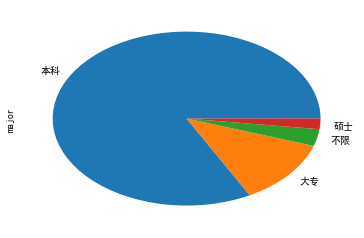

In [147]:
gz['major'].value_counts().plot(kind='pie')
for i, j in zip(gz['major'].value_counts().values, gz['major'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

major
不限    12.625000
大专     9.532258
本科    14.719340
硕士    14.000000
Name: salary, dtype: float64
[0,10.943297,14.306703],
[1,8.576817,10.487700],
[2,14.167157,15.271522],
[3,9.751471,18.248529],


array([ 12.625     ,   9.53225806,  14.71933962,  14.        ])

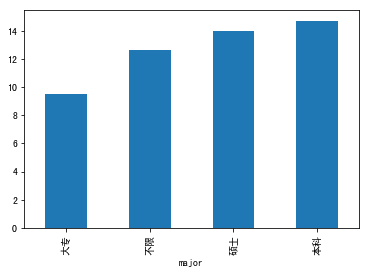

In [148]:
gz['salary'].groupby(gz['major']).mean().sort_values().plot(kind='bar')
print(gz['salary'].groupby(gz['major']).apply(industry_salary).ix[['不限', '大专', '本科', '硕士']])
m = gz['salary'].groupby(gz['major']).apply(industry_salary).ix[['不限', '大专', '本科', '硕士']].values
s = gz['salary'].groupby(gz['major']).apply(industry_salary_std).ix[['不限', '大专', '本科', '硕士']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
m

{values:311, name:"本科"},
{values:50, name:"大专"},
{values:15, name:"硕士"},
{values:7, name:"不限"},


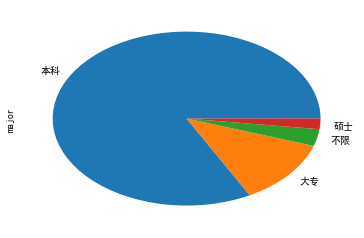

In [149]:
gz['major'].value_counts().plot(kind='pie')
for i, j in zip(sz['major'].value_counts().values, sz['major'].value_counts().index):
    print('{values:%d, name:"%s"},' % (i,j))

major
不限    17.142857
大专    11.400000
本科    18.757235
硕士    26.333333
Name: salary, dtype: float64
[0,13.828541,20.457174],
[1,10.104324,12.695676],
[2,18.128935,19.385535],
[3,22.917799,29.748867],


array([ 17.14285714,  11.4       ,  18.75723473,  26.33333333])

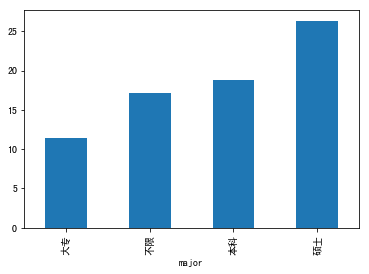

In [150]:
sz['salary'].groupby(sz['major']).mean().sort_values().plot(kind='bar')
print(sz['salary'].groupby(sz['major']).apply(industry_salary).ix[['不限', '大专', '本科', '硕士']])
m1 = sz['salary'].groupby(sz['major']).apply(industry_salary).ix[['不限', '大专', '本科', '硕士']].values
s1 = sz['salary'].groupby(sz['major']).apply(industry_salary_std).ix[['不限', '大专', '本科', '硕士']].values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
m1

In [151]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,10.943297,14.306703,13.828541,20.457174],
[1,8.576817,10.487700,10.104324,12.695676],
[2,14.167157,15.271522,18.128935,19.385535],
[3,9.751471,18.248529,22.917799,29.748867],


In [152]:
font = '/home/asrain/Downloads/font/落落汤圆.ttf'

In [153]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [154]:
import jieba

In [155]:
jieba.load_userdict('dictionary')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.369 seconds.
Prefix dict has been built succesfully.


In [220]:
def job_wc(data,):
    feature_list = []
    for x in data['job_features']:
        feature_list.extend(x.split(','))
    text = Series(feature_list).str.lower().value_counts().sort_values()
    wc = WordCloud(background_color='white',font_path=font, width=1400, height=1400, margin=2, collocations=False).generate_from_frequencies(text.to_dict())
    plt.figure(dpi=300)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    print(text.iloc[-20:])

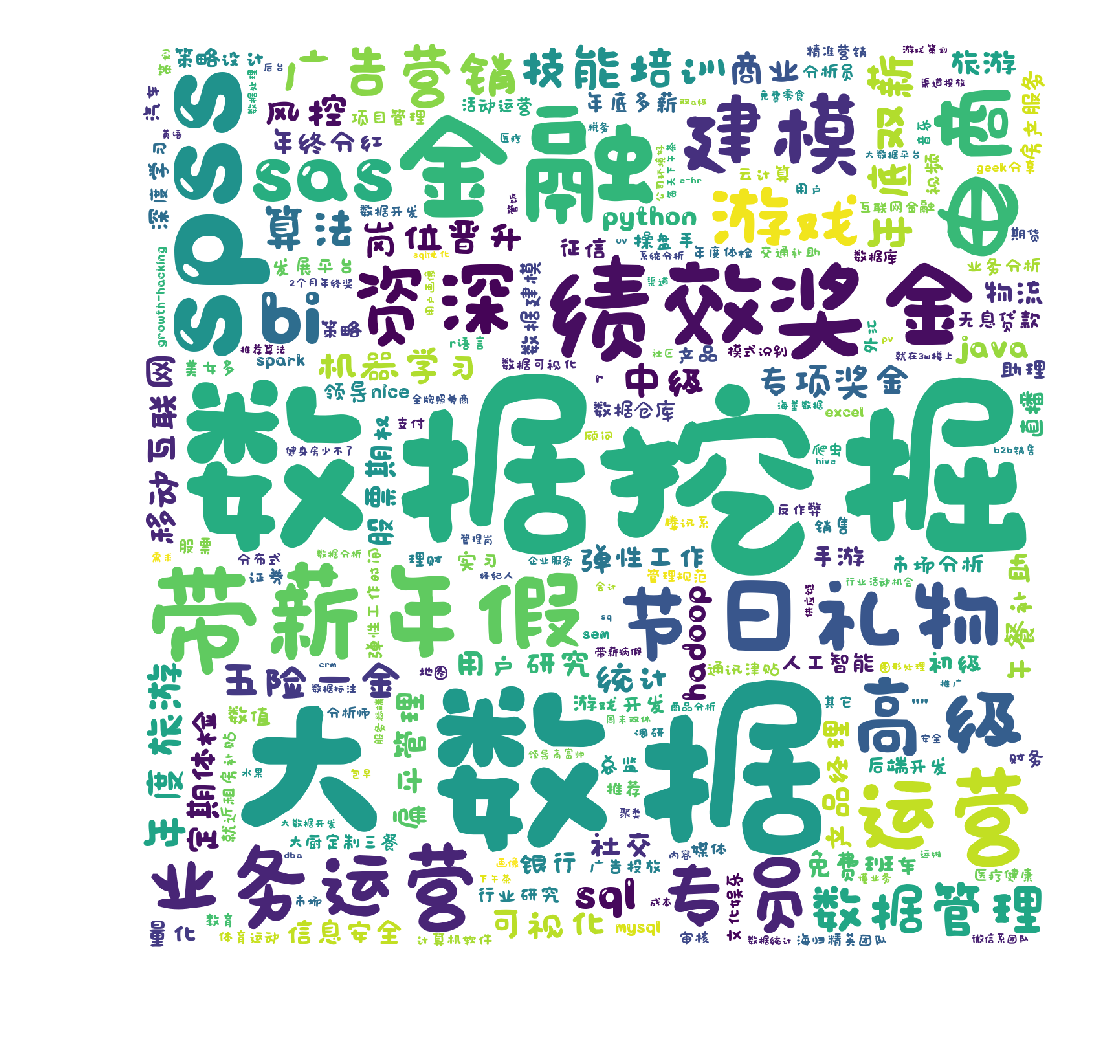

技能培训     25
数据管理     26
广告营销     27
游戏       29
专员       30
资深       31
业务运营     32
电商       35
bi       35
建模       37
运营       39
节日礼物     42
高级       42
sas      46
绩效奖金     50
带薪年假     50
金融       82
spss    132
大数据     234
数据挖掘    254
dtype: int64


In [221]:
job_wc(new_total)

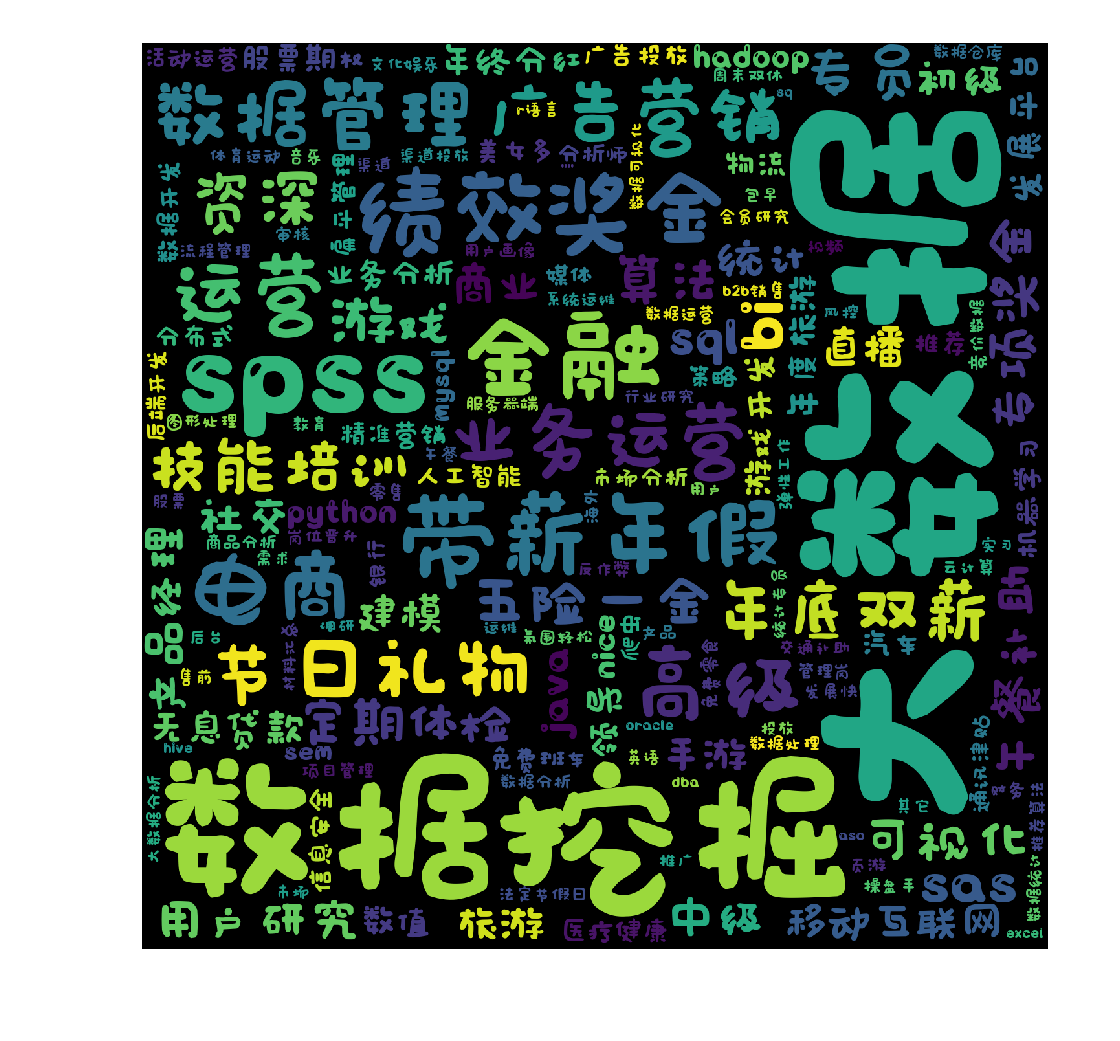

sql      10
游戏       11
资深       11
技能培训     12
sas      13
bi       13
年底双薪     13
业务运营     14
广告营销     14
运营       16
节日礼物     16
数据管理     16
电商       16
绩效奖金     21
高级       22
带薪年假     22
金融       26
spss     59
数据挖掘    100
大数据     104
dtype: int64


In [158]:
job_wc(gz)

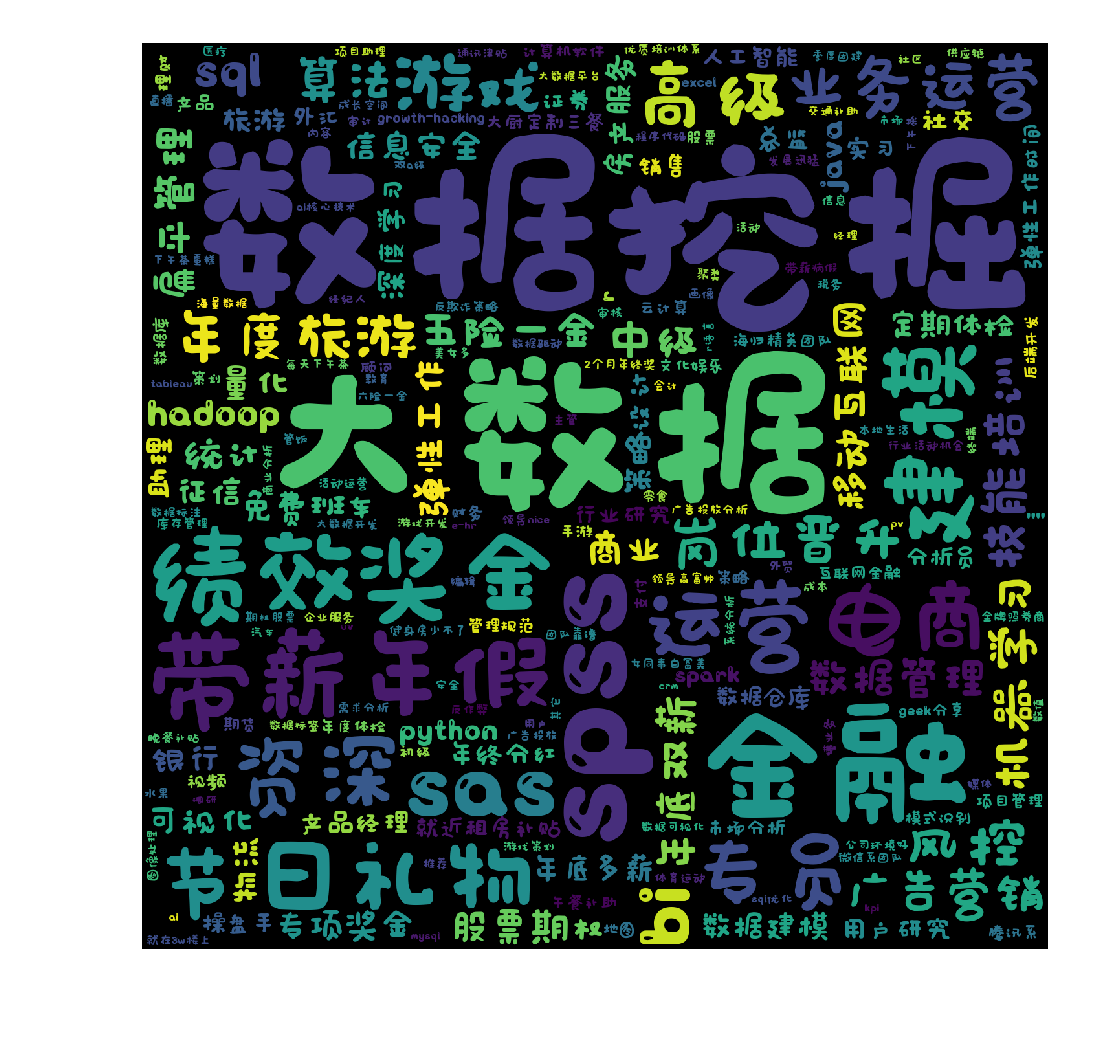

sql      15
风控       16
年度旅游     16
游戏       18
业务运营     18
电商       19
专员       20
资深       20
高级       20
bi       22
运营       23
节日礼物     26
带薪年假     28
绩效奖金     29
建模       32
sas      33
金融       56
spss     73
大数据     130
数据挖掘    154
dtype: int64


In [159]:
job_wc(sz)

In [160]:
#我对一些占比比较大的词，处理了一下近义词变成一样的词，并且不让他们被jieba分词，保持原来丰富明确的语义，剩下的一
#些语义不明确或者占比低的词再交给jieba分词，看能不能给jieba分出新的有用的，手工和机器配合

In [161]:
def comp_wc(data,):
    feature_list = []
        
        
        
    for x in data['comp_features']:
        feature_list.extend(x.split(','))
    
    trans_list = []
    cut_string = ''
    for word in feature_list:
        if word in transform.keys():
            trans_list.append(transform[word])
        else:
            cut_string += word.lower()
            if 'nic' in word:
                print(word)

            cutted_words = list(jieba.cut(cut_string, cut_all=False))
    trans_list.extend(cutted_words) 
        
    text_list = []
    stopwords = ['好', '大', '多', '有', '快', '不']
    for word in trans_list:
        if word not in stopwords:
            text_list.append(word)
    
    text = Series(text_list).value_counts()
    
    
    
    wc = WordCloud(background_color='white',font_path=font, width=1400, height=1400, margin=2).generate_from_frequencies(text.to_dict())
    plt.figure(dpi=300)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    #, collocations=False
    print(text.sort_values(ascending=False).head(20))

领导nice
领导nice
老板nice


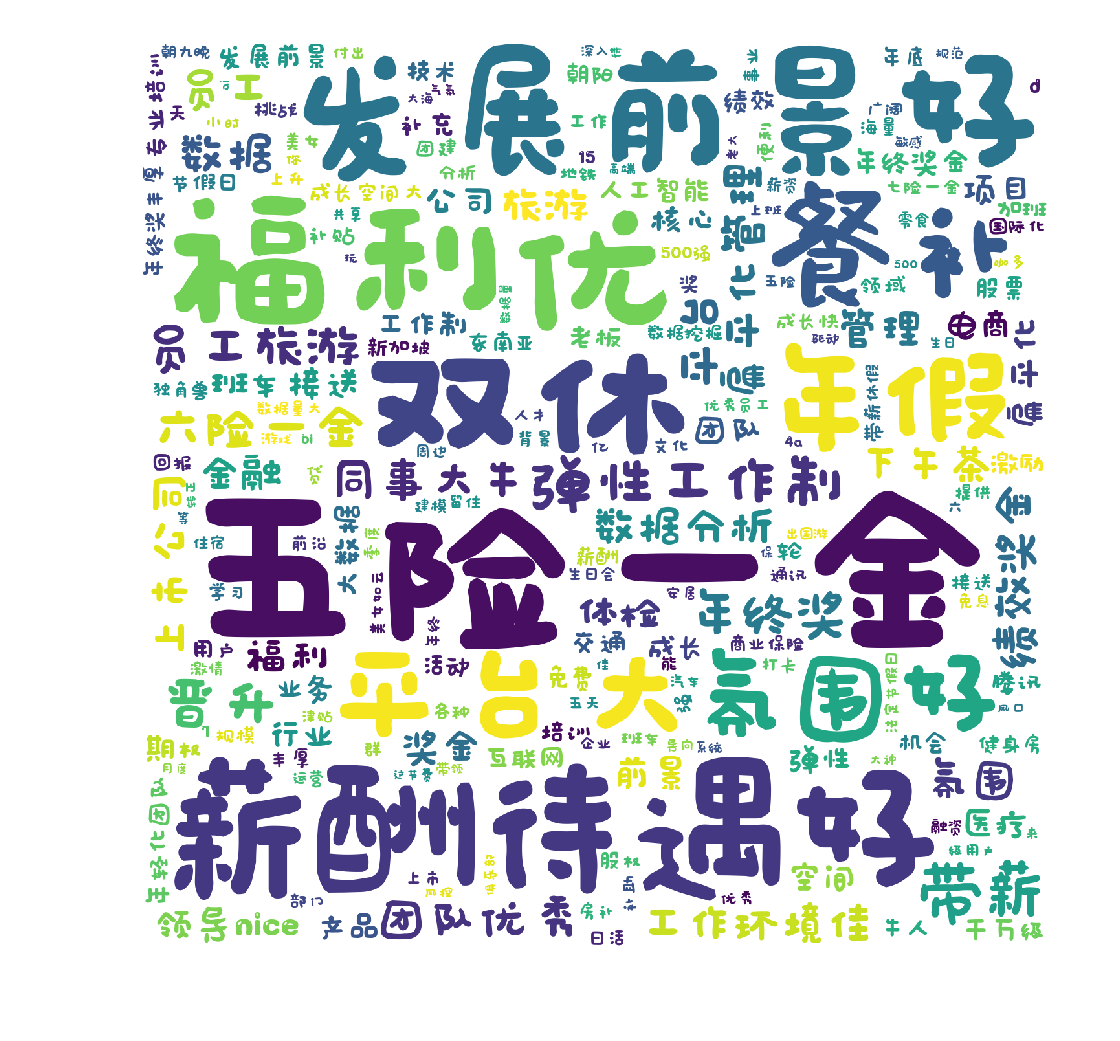

五险一金     155
福利优      109
双休       102
薪酬待遇好     85
发展前景好     82
餐补        67
年假        65
平台大       65
氛围好       65
弹性工作制     53
带薪        53
晋升        50
六险一金      39
平台        39
员工旅游      38
年终奖       38
团队优秀      34
同事大牛      32
数据        31
扁平化管理     30
dtype: int64


In [162]:
x = comp_wc(new_total)

领导nice


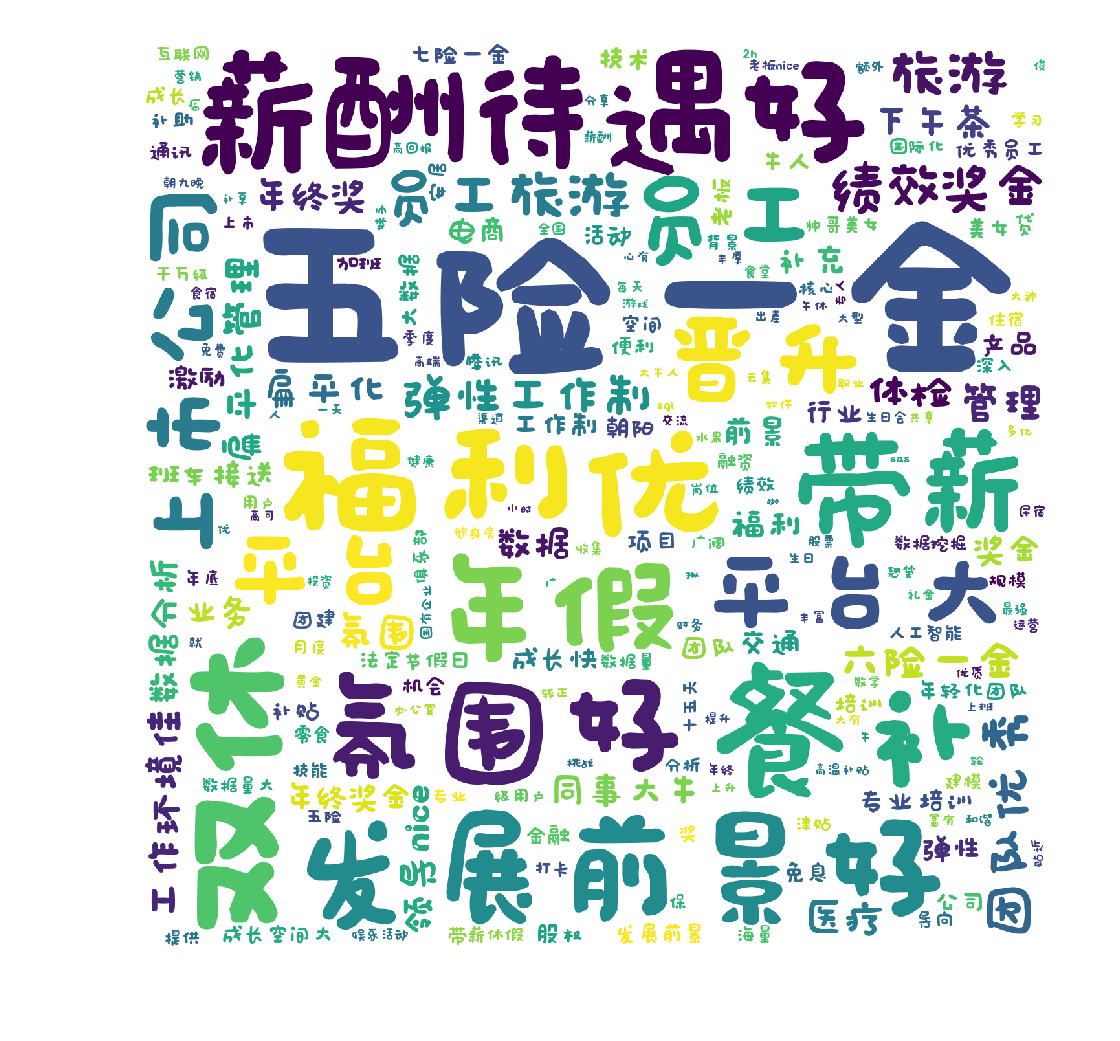

五险一金     79
双休       47
福利优      45
餐补       40
薪酬待遇好    34
发展前景好    31
年假       29
氛围好      28
带薪       24
晋升       20
平台大      20
平台       18
员工       17
上市公司     17
员工旅游     17
旅游       16
绩效奖金     15
团队优秀     15
弹性工作制    15
六险一金     13
dtype: int64


In [163]:
comp_wc(gz)

领导nice
老板nice


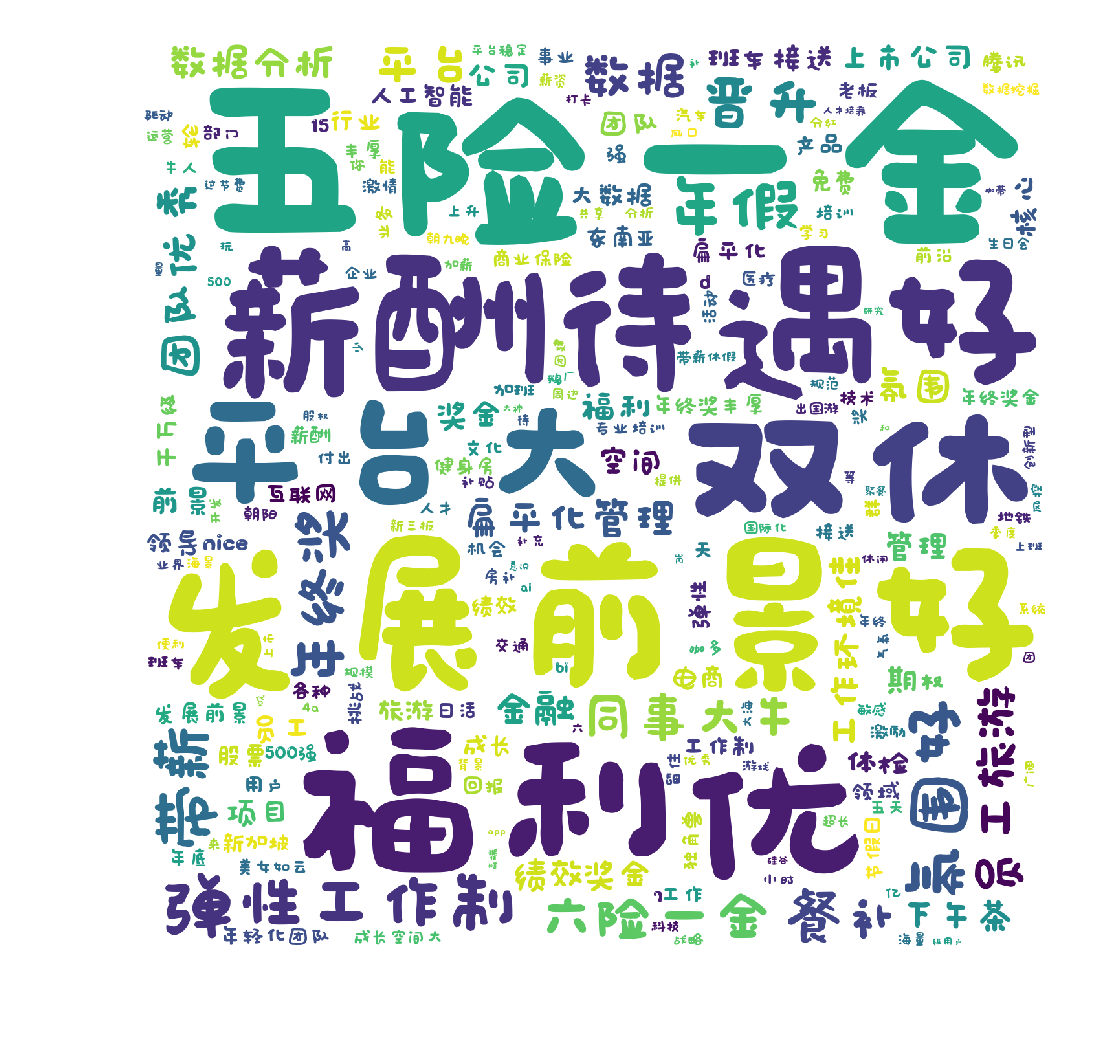

五险一金     76
福利优      64
双休       55
发展前景好    51
薪酬待遇好    51
平台大      45
弹性工作制    38
氛围好      37
年假       36
晋升       30
年终奖      29
带薪       29
餐补       27
六险一金     26
同事大牛     23
数据       22
平台       21
员工旅游     21
团队优秀     19
扁平化管理    19
dtype: int64


In [164]:
comp_wc(sz)

## 再来看看不同行业的要求和待遇

In [165]:
def join(data):
    require_text = ''
    for corpus in data['require']:
        require_text += corpus
        
    text = ' '.join(jieba.cut(require_text, cut_all=False))
        
    wc = WordCloud(background_color='white',font_path=font, width=1400, height=1400, margin=2, stopwords=['数据', '分析','进行','负责','岗位', '职责','岗位职责','要求','公司', 'xa0']).generate(text)
    plt.figure(dpi=300)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()


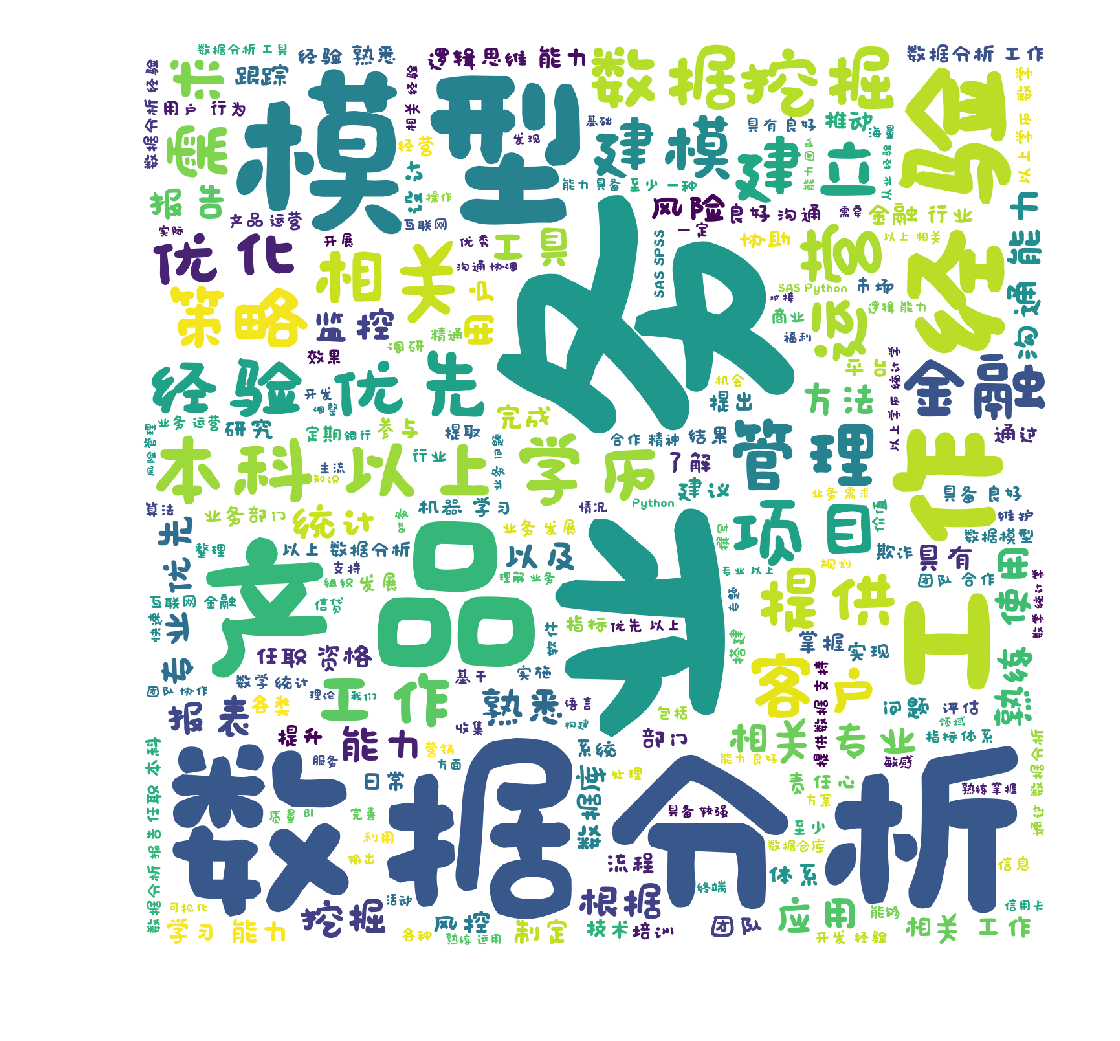

In [166]:
join(finance)

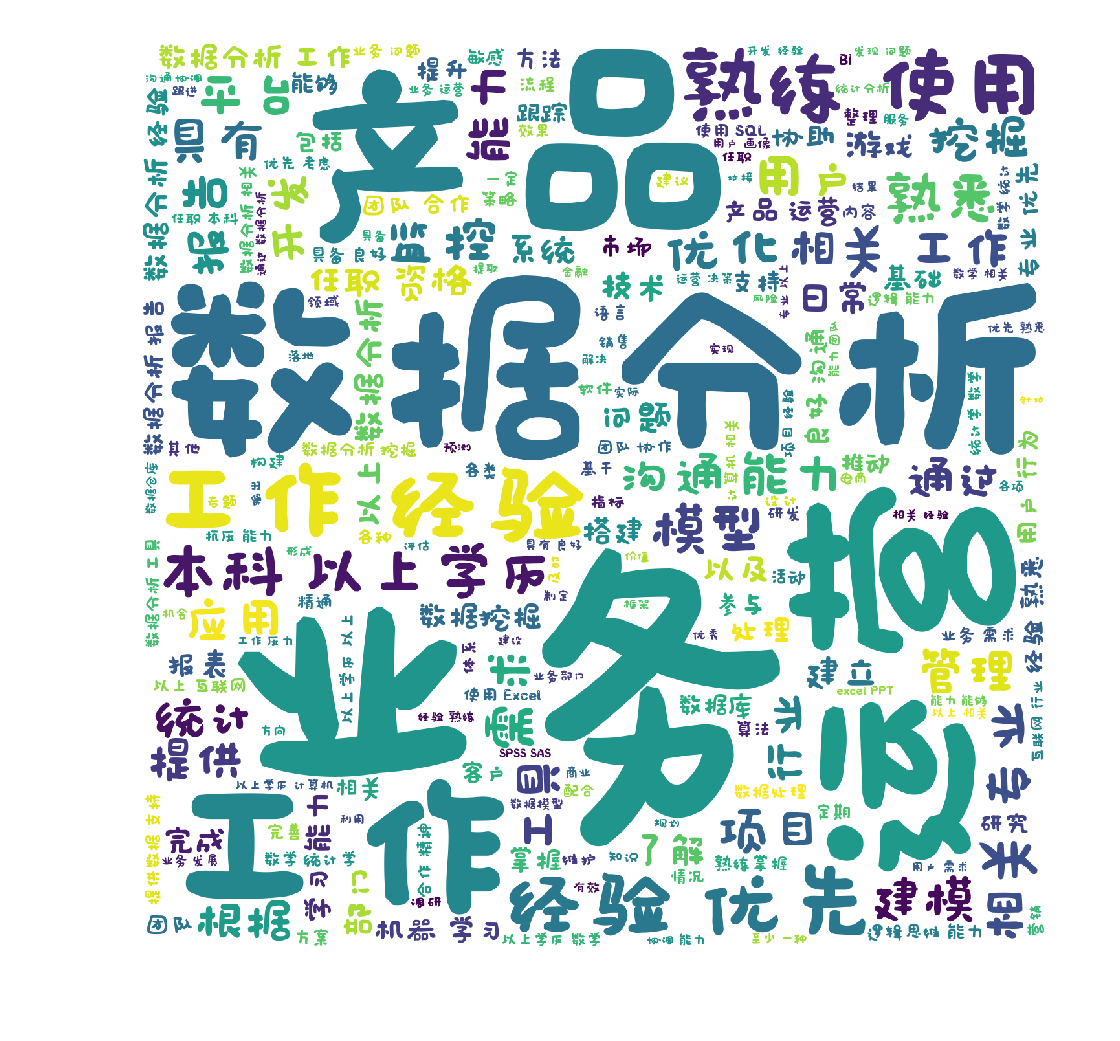

In [167]:
join(mobile_i)

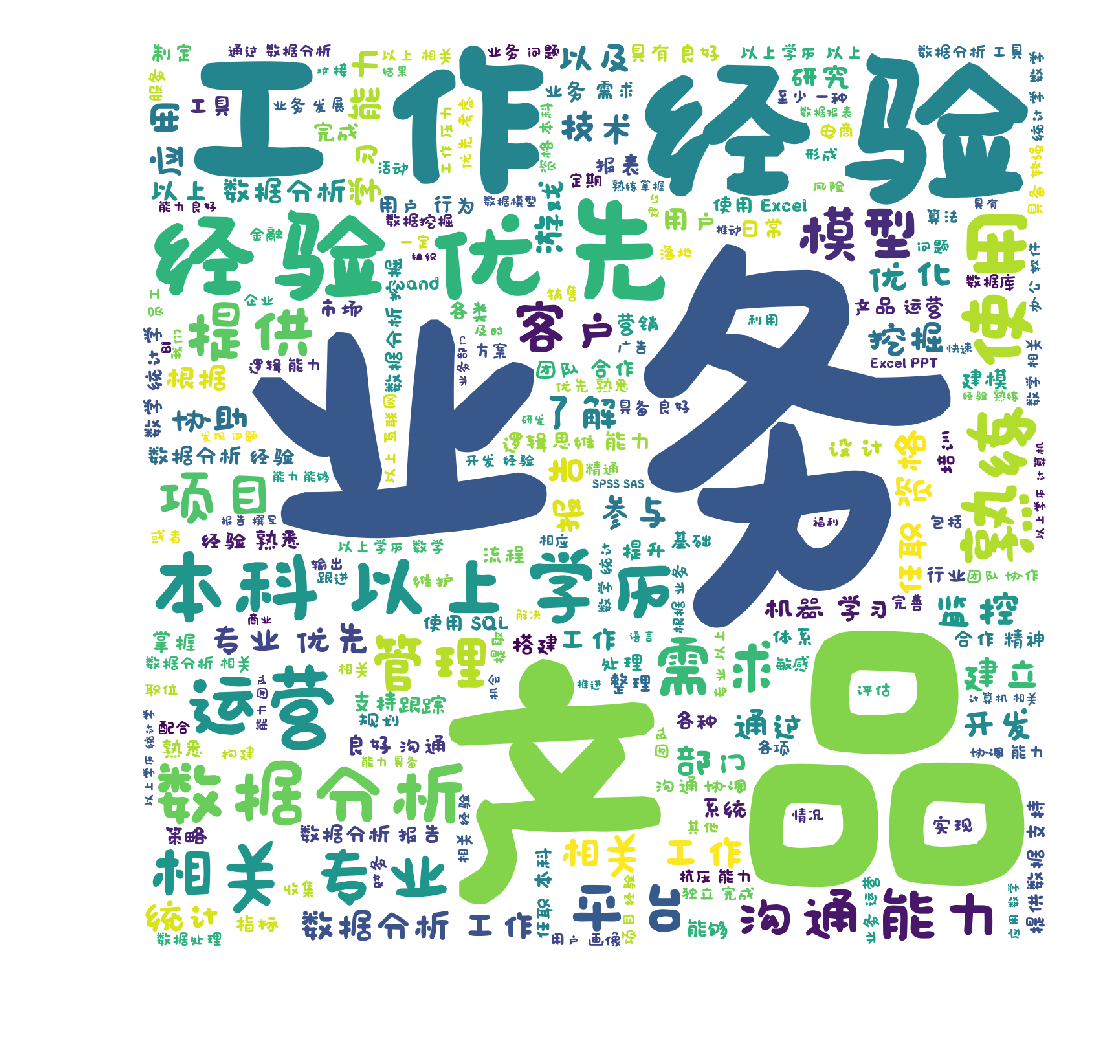

In [168]:
join(new_total)

In [169]:
' '.join(jieba.cut(new_total['require'][1], cut_all=False))

'岗位职责 ： 1 、 参与 数据分析 相关 项目 设计 、 开发 工作 ； 2 、 根据 项目 需要 进行 需求 规划 、 产品设计 功能 ； 3 、 编制 软件技术 文档 。 任职 资格 ： 1 、 计算机 、 数学 或 相关 专业本科 或 以上学历 ； 2 、 掌握 分析 的 理论知识 与 数据分析 方法 ， 并 能 灵活运用 到 实践 工作 中 。 3 、 具有 较强 的 文档 撰写 能力 ； 4 、 具有 良好 的 职业道德 和 工作 态度 ， 良好 的 团队 合作 和 协调 能力 ； 5 、 具备 数据处理 编程 基础 ， 懂 Oracle 数据库 、 R 语言 、 Python 语言 、 大 数据处理 技术 等 优先 ； 6 、 熟练 使用 BI 相关 工具软件 优先 。'

In [170]:
keywords = jieba

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [172]:
def tfidf(data):
    text_list = []
    for corpus in data['require']:
        text = ' '.join(jieba.cut(corpus, cut_all=False))
        text_list.append(text)
    vector = CountVectorizer(token_pattern='\\b\\w+\\b')
    vector.fit(text_list)
    bag_of_words = vector.transform(text_list)
    
    tfidf_transformer = TfidfTransformer()
    tfidf_transformer.fit(bag_of_words.toarray())
    
    return Series(tfidf_transformer.idf_, index=vector.get_feature_names())

In [173]:
tfidf(new_total).sort_values(ascending=False)

ｅ         6.768321
地理学       6.768321
基本功       6.768321
基数        6.768321
基层        6.768321
基因        6.768321
基业        6.768321
培训师       6.768321
城         6.768321
坚实        6.768321
坏账        6.768321
均值        6.768321
场合        6.768321
地说        6.768321
地理信息系统    6.768321
图情学       6.768321
地理        6.768321
地方        6.768321
地域        6.768321
地位        6.768321
地为        6.768321
在职员工      6.768321
在校学生      6.768321
在乎        6.768321
圣诞节       6.768321
图象        6.768321
图谱        6.768321
图片        6.768321
基本技能      6.768321
基本概念      6.768321
            ...   
沟通        1.561571
任职        1.531879
并         1.531879
熟悉        1.529223
进行        1.495321
负责        1.487659
专业        1.480054
业务        1.411735
以上        1.409379
以上学历      1.404684
对         1.397683
优先        1.354445
要求        1.334599
及         1.315139
5         1.315139
相关        1.244862
有         1.223144
能力        1.221192
数据分析      1.162519
工作        1.162519
经验        1.151550
等         1.

In [174]:
def join1(data):
    pattern = re.compile(r'[^\u4e00-\u9fa5]+')
    
    require_text = ''
    for corpus in data['require']:
        require_text += corpus
        
    filterdata = re.findall(pattern, require_text)
    require_text = ''.join(filterdata) 
    
    text = jieba.lcut(require_text, cut_all=False)
    return text

In [175]:
a = join1(new_total)

只要工具名，分析方法和包不要，以后再说

In [176]:
for i in set(sorted(a)):
    print(i)

PL
TOPTOP
Dynamicxa0Systemxa0prefered
”
skill
hive
Responsible
Weka
www
particular
xa0Mysql
1.6
level
ad
Alteryx
tool
share
－
Social
VBASQL
SQLserverL
tasking
hadoophbase
“
2.3
price
leader
AD
Team
MysqlOraclesql
ExceL
demonstrated
xa0SCIKIT
Firm
affecting
5A2
SQLtableau
STATA
bi
GO4
PLSQL
Excel
SQLxa0Server
⑤
CSS
Python7
Mail
sas
xa0xa0xa0
Media.4
xa0h5
linux3
monitor
18
2015
"
hbase
AWK
：
FineReportBI
regular
1.2
SPSS
Weekly
1208
xa0trigger3
++++++++++
SQL4
in
levels
SpSS
ExcelPPT
T
Bug
multitasking
k
consolidation
multiple
MBA
SQLPython
Shell
CP
deep
Congos
drive
15
Elasticsearch
cooperation
mongoDB
thinkPHP
E
WORD
python3
HIVE1
(
recommendations
teams
subsequently
5.6
study
one
python
13
Pivot
Exceloffice
department
PythonSQL
http
skills.4
consultant
b
MLib
ruby
caffe
part
it
PosgreSQL
R2
building
24
surface
Pentaho
20172018
needed.8
Scala
SQLNoSQL
HiveQL
boss
AARRR
tableau
youjindui
focuses
insightful
153
hadoop
sales
closing.3
UI
5BI
China
【
aggregate
commerce
actionable
uf06c
Re

In [177]:
tool = ['etl', 'scrypy', 'matlab', 'axure', 'weka', 'golang', 'javascript', 'jmp', 'julia', 'storm', 'birt', 'stata', 'pandas', 'pentaho', 'impala', 'go', 'kafka', 'adwords', 'tableau', 'oracle', 'spss', 'php', 'web', 'newsql', 'hql', 'congos', 'vba', 'excel', 'spark', 'eviews', 'mxnet', 'python', 'qlik', 'flume', 'nlp', 'sas', 'azkaban', 'mongodb', 'erp', 'mapreduce', 'thinkphp', 'r', 'qlikview', 'cassandra', 'tidb', 'xgboost', 'redis', 'exposure', 'postgresql', 'tensorflow', 'c++', 'lnmp', 'mesos', 'linux', 'finereport', 'kettle', 'ruby', 'html', 'access', 'mysql', 'sql', 'unix', 'nosql', 'hiveql', 'office', 'scikit', 'mllib', 'lamp', 'hive', 'sqlserver', 'scala', 'ppt', 'hadoop', 'caffe', 'flink', 'photoshop', 'perl', 'docker', 'word', 'java', 'kylin', 'postgre', 'hivesql']

In [178]:
#['etl', 'scrypy', 'matlab', 'axure', 'powerpoint', 'weka', 'golang', 'javascript', 'apache', 'jmp', 'julia', 'storm', 'birt', 'stata', 'pandas', 'pentaho', 'impala', 'go', 'kafka', 'adwords', 'tableau', 'oracle', 'spss', 'php', 'web', 'newsql', 'hql', 'congos', 'vba', 'excel', 'spark', 'eviews', 'mxnet', 'python', 'qlik', 'flume', 'nlp', 'sas', 'azkaban', 'mongodb', 'erp', 'mapreduce', 'thinkphp', 'r', 'qlikview', 'cassandra', 'tidb', 'xgboost', 'redis', 'exposure', 'postgresql', 'tensorflow', 'c++', 'lnmp', 'mesos', 'linux', 'finereport', 'kettle', 'ruby', 'scikit-learn', 'html', 'access', 'mysql', 'sparkstorm', 'sql', 'unix', 'nosql', 'hiveql', 'office', 'scikit', 'mllib', 'lamp', 'flask', 'hive', 'sqlserver', 'scala', 'ppt', 'hadoop', 'caffe', 'flink', 'photoshop', 'perl', 'docker', 'word', 'java', 'kylin', 'django', 'postgre', 'hivesql']

In [179]:
def tool_name(x):
    tool_list = []
    for i in jieba.cut(x, cut_all=False):
        if i == 'powerpoint':
            tool_list.append('ppt')
        elif i.lower() in tool:
            tool_list.append(i.lower())
    return tool_list

In [180]:
new_total['tools'] = new_total['require'].map(tool_name)

In [181]:
new_total.columns

Index(['num', 'city', 'pos_name', 'company', 'experience', 'major', 'salary',
       'industry', 'condition', 'job_features', 'comp_features', 'link',
       'size', 'address', 'require', 'location', 'industy_O2O', 'industy_不限',
       'industy_企业服务', 'industy_信息安全', 'industy_其他', 'industy_医疗健康',
       'industy_广告营销', 'industy_招聘', 'industy_教育', 'industy_数据服务',
       'industy_文化娱乐', 'industy_旅游', 'industy_游戏', 'industy_生活服务',
       'industy_电子商务', 'industy_硬件', 'industy_社交网络', 'industy_移动互联网',
       'industy_金融', 'tools'],
      dtype='object')

In [182]:
len(tool)

83

In [183]:
tool_dm = DataFrame(np.zeros((len(new_total),len(tool))), columns=tool)

In [184]:
for i, j in enumerate(new_total['tools']):
    tool_dm.ix[i, j] = 1

In [185]:
tool_weights = tool_dm.sum().to_dict()

In [186]:
tool_dm.sum().sort_values()['ppt']

88.0

In [187]:
def draw(data):    
    text_dict = {}
    counts = data.sum()
    for i in counts.index:
        if counts[i] != 0:
            text_dict[i] = counts[i]
    wc = WordCloud(background_color='white',font_path=font, width=1400, height=1400, margin=2, stopwords=['数据', '分析','进行','负责','岗位', '职责','岗位职责','要求','公司']).generate_from_frequencies(text_dict)
    plt.figure(dpi=300)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

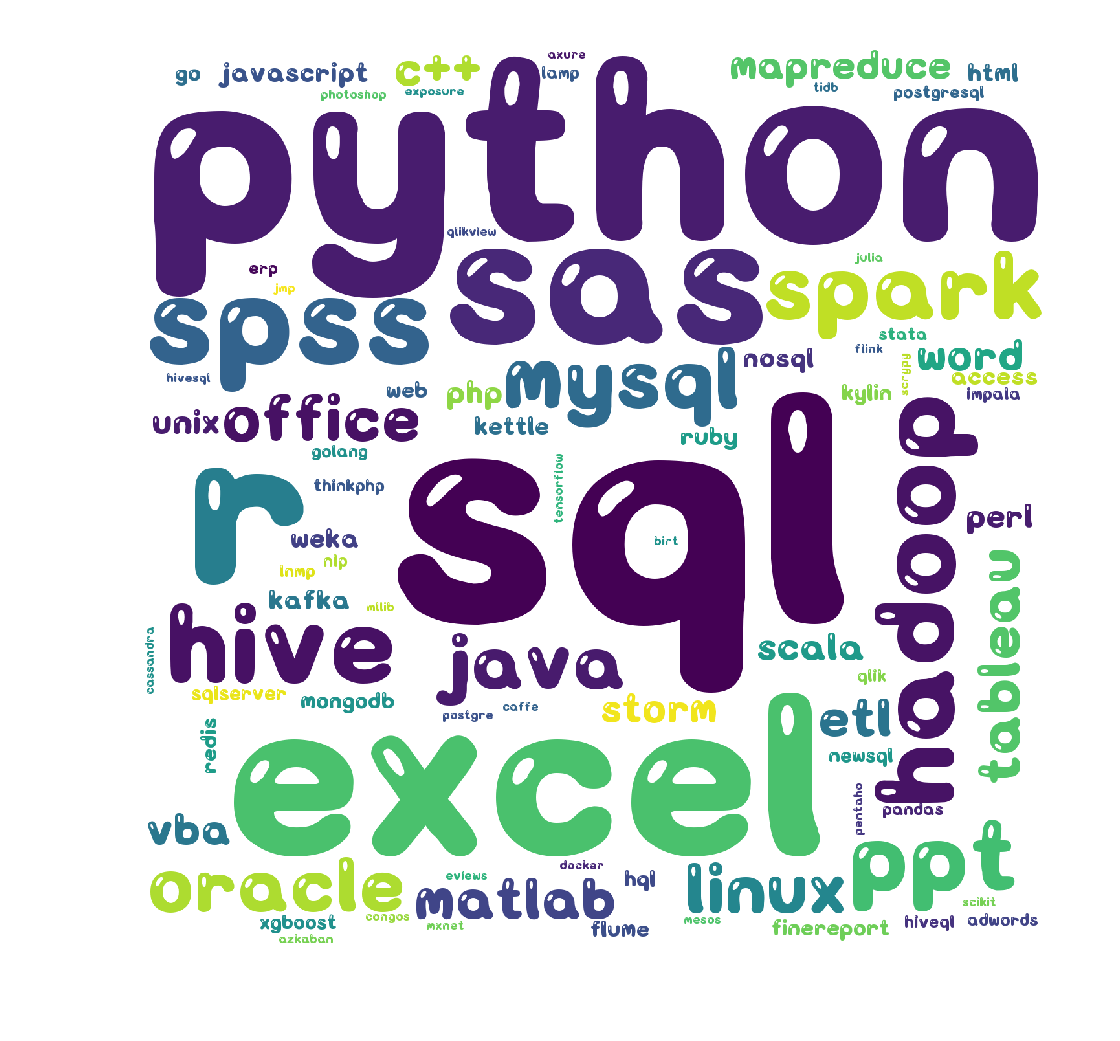

In [188]:
draw(tool_dm)

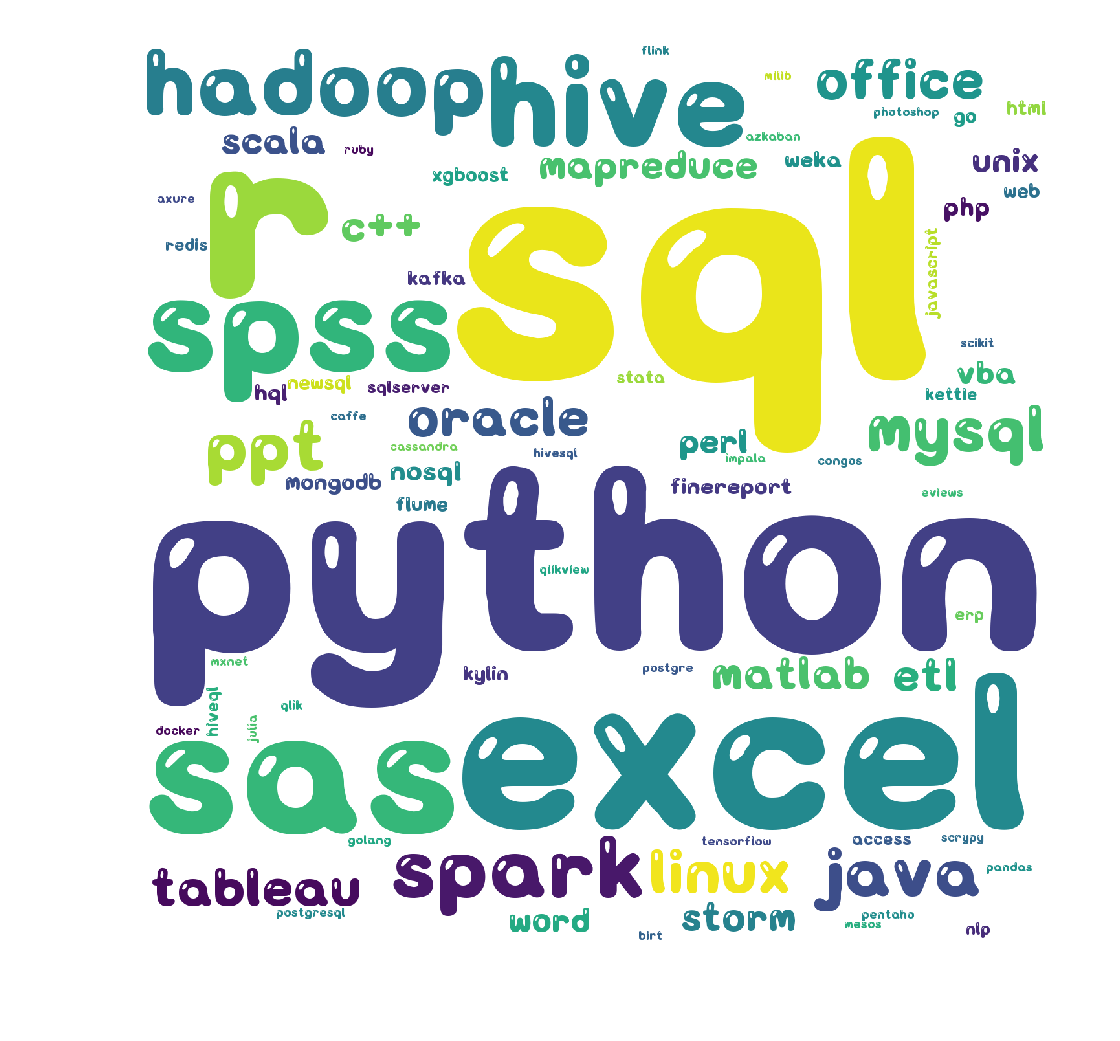

In [222]:
draw(tool_dm[new_total['city']=='深圳'])

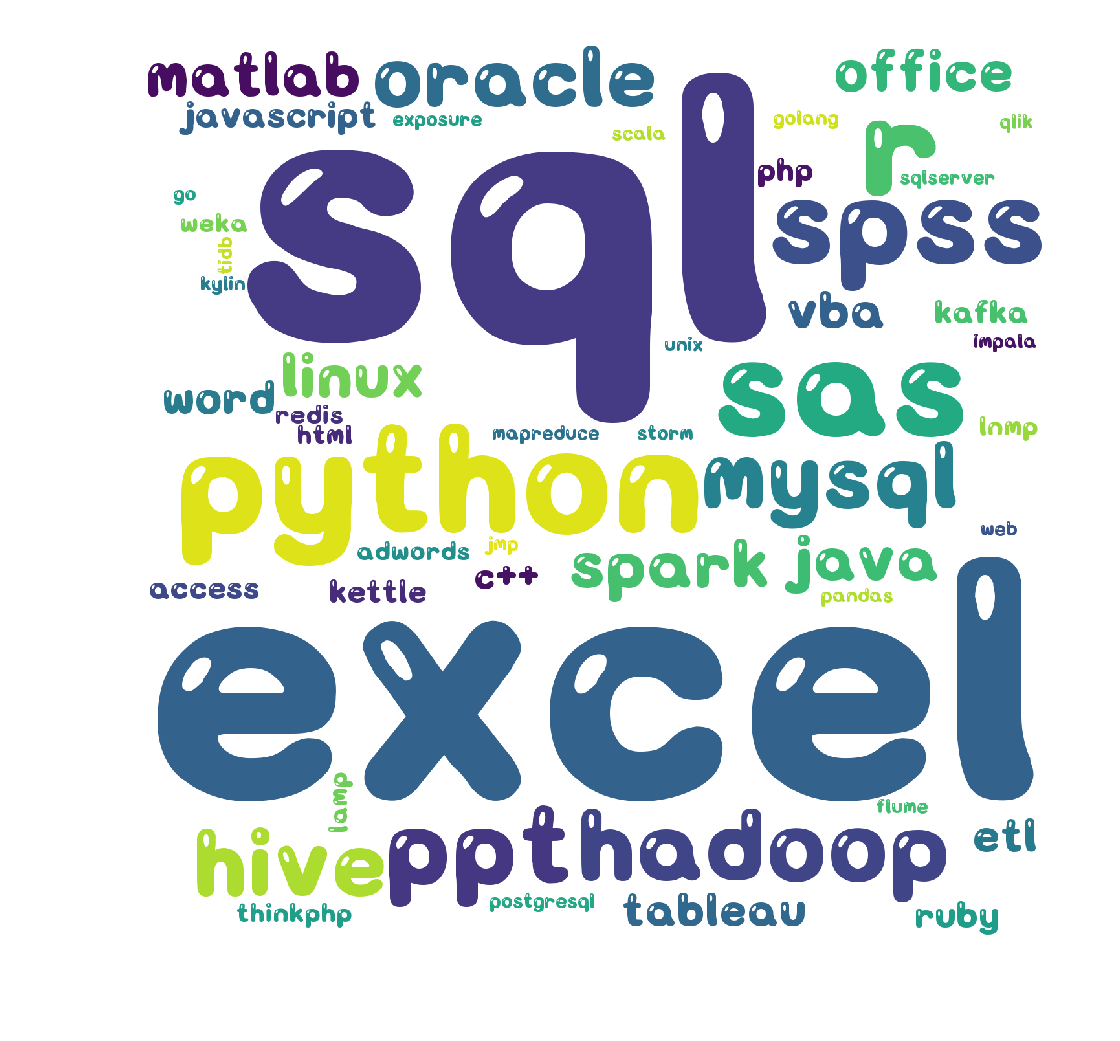

In [190]:
draw(tool_dm[new_total['city']=='广州'])

In [191]:
tool_dm.sum().sort_values(ascending=False).head(10).index

Index(['sql', 'python', 'excel', 'r', 'sas', 'spss', 'hadoop', 'hive', 'ppt',
       'spark'],
      dtype='object')

In [192]:
top_tool = tool_dm[['spark', 'hadoop', 'java', 'linux', 'hive', 'python', 'r', 'sas', 'sql', 'oracle', 'mysql', 'spss', 'tableau', 'ppt', 'excel']]

# 广州_工具

[0,19.593618,20.343882],
[1,20.598700,21.374984],
[2,16.871238,17.557334],
[3,16.565290,17.434710],
[4,19.471774,20.255498],
[5,15.297940,16.006938],
[6,14.987251,15.662100],
[7,14.847498,15.599871],
[8,15.062518,15.755664],
[9,17.475651,18.450275],
[10,16.615625,17.505587],
[11,12.950215,13.525195],
[12,15.812802,16.901483],
[13,11.275521,11.880035],
[14,10.872332,11.414624],


array([ 19.96875   ,  20.98684211,  17.21428571,  17.        ,
        19.86363636,  15.65243902,  15.32467532,  15.22368421,
        15.40909091,  17.96296296,  17.06060606,  13.23770492,
        16.35714286,  11.57777778,  11.14347826])

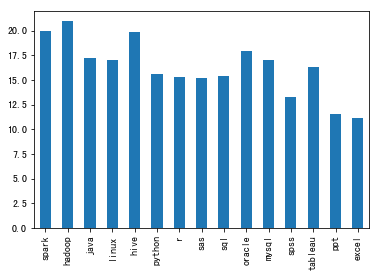

In [193]:
top_tool.mul(gz['salary'],axis=0).apply(industry_salary).plot(kind='bar')
m = top_tool.mul(gz['salary'],axis=0).apply(industry_salary).values
s = top_tool.mul(gz['salary'],axis=0).apply(industry_salary_std).values
for i in list(range(len(m))):
    print('[%d,%f,%f],'%(i,(m-s)[i], (m+s)[i]))
top_tool.mul(gz['salary'],axis=0).apply(industry_salary).values


# 深圳_工具

[0,25.201338,26.631996],
[1,23.391648,24.816144],
[2,24.031432,25.553933],
[3,23.798689,25.233569],
[4,22.097403,23.183085],
[5,20.679385,21.912569],
[6,19.935598,21.121006],
[7,18.850854,20.219943],
[8,18.496633,19.460510],
[9,16.459824,17.309406],
[10,17.117552,18.132448],
[11,18.960531,20.431626],
[12,16.930630,17.902704],
[13,15.130938,16.124876],
[14,14.779080,15.898339],


array([ 25.91666667,  24.1038961 ,  24.79268293,  24.51612903,
        22.6402439 ,  21.29597701,  20.52830189,  19.53539823,
        18.97857143,  16.88461538,  17.625     ,  19.69607843,
        17.41666667,  15.62790698,  15.33870968])

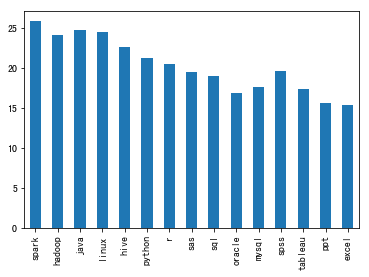

In [194]:
top_tool.mul(sz['salary'],axis=0).apply(industry_salary).plot(kind='bar')
m1 = top_tool.mul(sz['salary'],axis=0).apply(industry_salary).values
s1 = top_tool.mul(sz['salary'],axis=0).apply(industry_salary_std).values
for i in list(range(len(m1))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
top_tool.mul(sz['salary'],axis=0).apply(industry_salary).values


In [195]:
for i in list(range(len(m))):
    print('[%d,%f,%f,%f,%f],'%(i,(m-s)[i], (m+s)[i], (m1-s1)[i], (m1+s1)[i]))

[0,19.593618,20.343882,25.201338,26.631996],
[1,20.598700,21.374984,23.391648,24.816144],
[2,16.871238,17.557334,24.031432,25.553933],
[3,16.565290,17.434710,23.798689,25.233569],
[4,19.471774,20.255498,22.097403,23.183085],
[5,15.297940,16.006938,20.679385,21.912569],
[6,14.987251,15.662100,19.935598,21.121006],
[7,14.847498,15.599871,18.850854,20.219943],
[8,15.062518,15.755664,18.496633,19.460510],
[9,17.475651,18.450275,16.459824,17.309406],
[10,16.615625,17.505587,17.117552,18.132448],
[11,12.950215,13.525195,18.960531,20.431626],
[12,15.812802,16.901483,16.930630,17.902704],
[13,11.275521,11.880035,15.130938,16.124876],
[14,10.872332,11.414624,14.779080,15.898339],


# 两城市平均

In [587]:
tool_dm.sum().sort_values(ascending=False).head(16).index

Index(['sql', 'python', 'excel', 'r', 'sas', 'spss', 'hadoop', 'hive', 'ppt',
       'spark', 'mysql', 'java', 'oracle', 'linux', 'office', 'tableau'],
      dtype='object')

In [588]:
top_tool = tool_dm[['sql', 'python', 'excel', 'r', 'sas', 'spss', 'hadoop', 'hive', 'ppt',
       'spark', 'mysql', 'java', 'oracle', 'linux', 'tableau']]

[0,17.079044,18.122710],
[1,18.758252,20.218310],
[2,12.729166,13.911001],
[3,18.114662,19.546355],
[4,16.961396,18.641779],
[5,16.338654,18.219629],
[6,21.988941,24.158885],
[7,20.957397,22.729559],
[8,12.734050,14.379587],
[9,23.411541,26.100654],
[10,16.294960,18.415185],
[11,21.213085,24.514187],
[12,16.256800,18.611124],
[13,20.537483,24.053426],
[14,15.632127,18.722712],


array([ 17.60087719,  19.48828125,  13.32008368,  18.83050847,
        17.8015873 ,  17.2791411 ,  23.07391304,  21.84347826,
        13.55681818,  24.75609756,  17.35507246,  22.86363636,
        17.43396226,  22.29545455,  17.17741935])

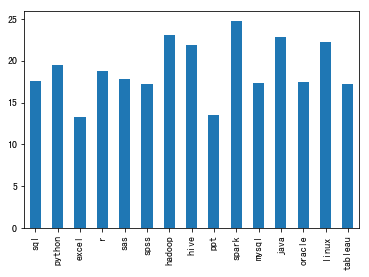

In [589]:
top_tool.mul(new_total['salary'],axis=0).apply(industry_salary).plot(kind='bar')
m1 = top_tool.mul(new_total['salary'],axis=0).apply(industry_salary).values
s1 = top_tool.mul(new_total['salary'],axis=0).apply(industry_salary_std).values
for i in list(range(len(m1))):
    print('[%d,%f,%f],'%(i,(m1-s1)[i], (m1+s1)[i]))
top_tool.mul(new_total['salary'],axis=0).apply(industry_salary).values


In [530]:
'''
取6个行业的sql、python、r、excel、sas、spss比较，因为在这几个行业，这些工具出现率都排在前十，并且通常就是前6

其他的工具，不同行业也会有些不一样，但影响力不及这6个高，但也有分析的空间：
例如在其他五个行业排名较前的sas，在游戏行业排名较后，并且游戏行业对linux了解的要求远比其他几个行业高
但是其他工具对应的数据相对也较少，相互比较出的结论可能没有代表性，并且比较的方向会比较杂乱，所以先只对这六个工具进行比较

'''

'\n取6个行业的sql、python、r、excel、sas、spss比较，因为在这几个行业，这些工具出现率都排在前十，并且通常就是前6\n\n其他的工具，不同行业也会有些不一样，但影响力不及这6个高，但也有分析的空间：\n例如在其他五个行业排名较前的sas，在游戏行业排名较后，并且游戏行业对linux了解的要求远比其他几个行业高\n但是其他工具对应的数据相对也较少，相互比较出的结论可能没有代表性，并且比较的方向会比较杂乱，所以先只对这六个工具进行比较\n\n'

# 6行业工具前20

In [579]:
def ranks(name):
    print(name)
    return tool_dm.loc[dummies[name]==1].sum().sort_values(ascending=False)\
.head(20)/tool_dm[dummies[name]==1].sum().sum()

In [580]:
ranks('移动互联网')

移动互联网


sql          0.133671
python       0.106214
r            0.099711
excel        0.091040
sas          0.065751
spss         0.063584
hive         0.055636
hadoop       0.049133
spark        0.044798
ppt          0.041908
java         0.026734
mysql        0.025289
linux        0.022399
tableau      0.016618
oracle       0.015896
office       0.013006
matlab       0.011561
c++          0.010116
etl          0.010116
mapreduce    0.007225
dtype: float64

In [581]:
ranks('金融')

金融


sql          0.174917
sas          0.136964
r            0.115512
python       0.110561
spss         0.082508
excel        0.082508
oracle       0.036304
hive         0.031353
hadoop       0.029703
office       0.021452
mysql        0.021452
spark        0.019802
ppt          0.019802
matlab       0.011551
mapreduce    0.009901
etl          0.009901
java         0.009901
vba          0.008251
linux        0.008251
c++          0.004950
dtype: float64

In [582]:
ranks('电子商务')

电子商务


sql        0.151515
excel      0.128788
python     0.090909
sas        0.070707
r          0.065657
hive       0.065657
hadoop     0.053030
spss       0.045455
mysql      0.042929
ppt        0.035354
oracle     0.032828
spark      0.025253
linux      0.017677
office     0.015152
etl        0.015152
java       0.015152
tableau    0.012626
c++        0.010101
vba        0.010101
word       0.010101
dtype: float64

In [569]:
ranks('游戏')

游戏


sql           0.125475
python        0.121673
r             0.087452
excel         0.076046
hadoop        0.076046
hive          0.060837
linux         0.057034
spss          0.057034
spark         0.053232
sas           0.034221
mysql         0.026616
java          0.022814
c++           0.019011
ppt           0.019011
office        0.019011
scala         0.015209
unix          0.011407
php           0.011407
tableau       0.011407
javascript    0.011407
dtype: float64

In [570]:
ranks('数据服务')

数据服务


sql        0.126984
python     0.111111
r          0.095238
spss       0.076190
sas        0.073016
excel      0.069841
java       0.053968
ppt        0.047619
spark      0.041270
hadoop     0.038095
tableau    0.028571
matlab     0.028571
hive       0.025397
scala      0.015873
storm      0.012698
oracle     0.012698
mysql      0.012698
office     0.009524
etl        0.009524
word       0.006349
dtype: float64

In [571]:
ranks('企业服务')

企业服务


sql        0.15000
excel      0.14375
python     0.10625
r          0.08750
spss       0.07500
sas        0.05625
ppt        0.04375
hadoop     0.03750
oracle     0.03750
java       0.03125
spark      0.03125
word       0.02500
hive       0.02500
mysql      0.01875
office     0.01250
tableau    0.01250
c++        0.01250
impala     0.01250
storm      0.01250
matlab     0.01250
dtype: float64

# 6行业6工具'提及率'

In [532]:
def tool_freq(name):
    print(name)
    return tool_dm[['sql','python', 'r', 'excel', 'sas', 'spss']][dummies[name]==1].sum()\
.sort_values(ascending=False).values/(dummies[name]==1).sum()

In [533]:
tool_freq('移动互联网')

移动互联网


array([ 0.54411765,  0.43235294,  0.40588235,  0.37058824,  0.26764706,
        0.25882353])

In [534]:
tool_freq('金融')

金融


array([ 0.69281046,  0.54248366,  0.45751634,  0.4379085 ,  0.32679739,
        0.32679739])

In [535]:
tool_freq('电子商务')

电子商务


array([ 0.51282051,  0.43589744,  0.30769231,  0.23931624,  0.22222222,
        0.15384615])

In [536]:
tool_freq('数据服务')

数据服务


array([ 0.47058824,  0.41176471,  0.35294118,  0.28235294,  0.27058824,
        0.25882353])

In [537]:
tool_freq('游戏')

游戏


array([ 0.49253731,  0.47761194,  0.34328358,  0.29850746,  0.2238806 ,
        0.13432836])

In [538]:
tool_freq('企业服务')

企业服务


array([ 0.48979592,  0.46938776,  0.34693878,  0.28571429,  0.24489796,
        0.18367347])

In [207]:
'''for i in sz.index:
    if sz.ix[i,'salay']
    print('{name:"%s", value: [%s, %s]},' %  tuple(sz.ix[i, ['company', 'location', 'salary']]))
    '''

'for i in sz.index:\n    if sz.ix[i,\'salay\']\n    print(\'{name:"%s", value: [%s, %s]},\' %  tuple(sz.ix[i, [\'company\', \'location\', \'salary\']]))\n    '

# 获得公司所在区域

In [ ]:
def get_qu(x):
    pat = re.compile(r'(..区)')
    return pat.search(x).groups()[0]

In [ ]:
new_total['address'][110] ='黄埔区'
new_total['address'][217] ='天河区'
new_total['address'][218] ='天河区'
new_total['address'][385] ='福田区'
new_total['address'][388] ='福田区'
new_total['address'][425] ='罗湖区'
new_total['address'][357] ='龙华区'
new_total['address'][483] ='龙华区'
new_total['address'][490] ='龙华区'
new_total['address'][517] ='龙华区'
new_total['address'][551] ='龙华区'

In [ ]:
new_total['address'].map(get_qu).unique()

In [ ]:
district = new_total['address'].map(get_qu)

In [ ]:
district[district=='萝岗区'] = '黄埔区'

In [ ]:
new_total['salary'].groupby(district).mean()

In [ ]:
#深圳超过40的10个岗位，45-80
#广州超过30的10个岗位 31.5-45